In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from utils.data import  DataLoader, split_data
from utils.metrics import calc_metrics
from utils.visulization import plot_confusion_matrix
#feature scaling
#from sklearn.preprocessing import StandardScaler
#from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# load and split the data

In [2]:
dataset = "filtered"

if dataset == "filtered":
    filename='encoded/encoded_filtered_train_data_with_encoded_y.csv'
    test_filename='encoded/encoded_test_data_with_encoded_y.csv'


In [3]:
dl = DataLoader("./config.json")
dl.load_csv_data(filename=filename, test_filename=test_filename)
train_data = dl.get_data(include_target_column = True)
test_data = dl.get_test_data(include_target_column = True)
#train_data.info()
# split the data
X_train, y_train = dl.get_features_and_target(train_data)
X_train, X_val, y_train, y_val = split_data(X_train, y_train, test_size=0.2, random_state=512)

X_test, y_test = dl.get_features_and_target(test_data)

loading test data from: C:\Users\dujem\PycharmProjects\bank-marketing\data\encoded/encoded_test_data_with_encoded_y.csv
loading data from: C:\Users\dujem\PycharmProjects\bank-marketing\data\encoded/encoded_filtered_train_data_with_encoded_y.csv
memory occupation before data type conversion: 13.82 MB
memory occupation after data type conversion: 7.04 MB
memory occupation before data type conversion: 1.6 MB
memory occupation after data type conversion: 820.71 KB


# Create and fit classifier

In [4]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_val = lgb.Dataset(X_val, label=y_val)

In [5]:
lgb_params={'objective':"binary", 
            'boosting':"gbdt",
            'metric':"auc",
            'boost_from_average':False,
            'num_threads':8,
            'learning_rate':0.0081,
            'num_leaves':13,
            'max_depth':-1,
            'feature_fraction':0.041,
            'bagging_freq':5,
            'bagging_fraction':0.331,
            'min_data_in_leaf':80,
            'min_sum_hessian_in_leaf':10.0,
            'verbosity':1,
            'num_iterations':20000,
            'seed':512}

In [6]:
#training with default params
evals_results = {}
#lgb_params = {}
lgb_params['metric'] = 'auc'
lgb_params['objective'] = 'binary'
clf = lgb.train(lgb_params, lgb_train, 
                valid_sets=[lgb_train, lgb_val], 
                valid_names=['train','valid'], 
                evals_result=evals_results)

C:\Users\dujem\Anaconda3\envs\notebook\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	train's auc: 0.776629	valid's auc: 0.771951
[2]	train's auc: 0.774178	valid's auc: 0.770563
[3]	train's auc: 0.77493	valid's auc: 0.770449
[4]	train's auc: 0.780588	valid's auc: 0.77775
[5]	train's auc: 0.783018	valid's auc: 0.779796
[6]	train's auc: 0.782219	valid's auc: 0.779454
[7]	train's auc: 0.787072	valid's auc: 0.78441
[8]	train's auc: 0.787765	valid's auc: 0.784961
[9]	train's auc: 0.788263	valid's auc: 0.785475
[10]	train's auc: 0.788475	valid's auc: 0.78575
[11]	train's auc: 0.790106	valid's auc: 0.787898
[12]	train's auc: 0.789627	valid's auc: 0.787771
[13]	train's auc: 0.790201	valid's auc: 0.788136
[14]	train's auc: 0.790746	valid's auc: 0.788013
[15]	train's auc: 0.789767	valid's auc: 0.786201
[16]	train's auc: 0.790227	valid's auc: 0.786955
[17]	train's auc: 0.790524	valid's auc: 0.785817
[18]	train's auc: 0.790747	valid's auc: 0.785661
[19]	train's auc: 0.791832	valid's auc: 0.786478
[20]	train's auc: 0.792018	valid's auc: 0.787015
[21]	train's auc: 0.792151	valid'

[182]	train's auc: 0.793807	valid's auc: 0.789327
[183]	train's auc: 0.793893	valid's auc: 0.789447
[184]	train's auc: 0.793834	valid's auc: 0.789482
[185]	train's auc: 0.793838	valid's auc: 0.789336
[186]	train's auc: 0.793874	valid's auc: 0.789346
[187]	train's auc: 0.793937	valid's auc: 0.789379
[188]	train's auc: 0.793876	valid's auc: 0.789358
[189]	train's auc: 0.793892	valid's auc: 0.789349
[190]	train's auc: 0.793805	valid's auc: 0.789218
[191]	train's auc: 0.793894	valid's auc: 0.789287
[192]	train's auc: 0.793865	valid's auc: 0.78926
[193]	train's auc: 0.793875	valid's auc: 0.789249
[194]	train's auc: 0.793901	valid's auc: 0.789279
[195]	train's auc: 0.793979	valid's auc: 0.789357
[196]	train's auc: 0.793945	valid's auc: 0.789363
[197]	train's auc: 0.793983	valid's auc: 0.789387
[198]	train's auc: 0.793982	valid's auc: 0.789383
[199]	train's auc: 0.794024	valid's auc: 0.789409
[200]	train's auc: 0.794014	valid's auc: 0.789402
[201]	train's auc: 0.794027	valid's auc: 0.789224
[

[352]	train's auc: 0.795571	valid's auc: 0.790317
[353]	train's auc: 0.795546	valid's auc: 0.790226
[354]	train's auc: 0.795625	valid's auc: 0.790205
[355]	train's auc: 0.795659	valid's auc: 0.790274
[356]	train's auc: 0.79568	valid's auc: 0.790294
[357]	train's auc: 0.795689	valid's auc: 0.790318
[358]	train's auc: 0.795727	valid's auc: 0.790359
[359]	train's auc: 0.795779	valid's auc: 0.790445
[360]	train's auc: 0.795753	valid's auc: 0.790438
[361]	train's auc: 0.795769	valid's auc: 0.790436
[362]	train's auc: 0.795768	valid's auc: 0.790442
[363]	train's auc: 0.795795	valid's auc: 0.79051
[364]	train's auc: 0.79576	valid's auc: 0.790482
[365]	train's auc: 0.795785	valid's auc: 0.790513
[366]	train's auc: 0.795807	valid's auc: 0.790534
[367]	train's auc: 0.795886	valid's auc: 0.790569
[368]	train's auc: 0.795884	valid's auc: 0.790566
[369]	train's auc: 0.795859	valid's auc: 0.790497
[370]	train's auc: 0.79588	valid's auc: 0.790522
[371]	train's auc: 0.795923	valid's auc: 0.79055
[372]

[567]	train's auc: 0.799126	valid's auc: 0.79248
[568]	train's auc: 0.79913	valid's auc: 0.792516
[569]	train's auc: 0.799132	valid's auc: 0.792474
[570]	train's auc: 0.799135	valid's auc: 0.79247
[571]	train's auc: 0.799162	valid's auc: 0.792483
[572]	train's auc: 0.799175	valid's auc: 0.792531
[573]	train's auc: 0.799195	valid's auc: 0.792524
[574]	train's auc: 0.799198	valid's auc: 0.792526
[575]	train's auc: 0.799277	valid's auc: 0.792598
[576]	train's auc: 0.799274	valid's auc: 0.792596
[577]	train's auc: 0.799256	valid's auc: 0.792597
[578]	train's auc: 0.799302	valid's auc: 0.792571
[579]	train's auc: 0.799316	valid's auc: 0.792591
[580]	train's auc: 0.799314	valid's auc: 0.792585
[581]	train's auc: 0.799307	valid's auc: 0.792538
[582]	train's auc: 0.799313	valid's auc: 0.792555
[583]	train's auc: 0.799365	valid's auc: 0.792589
[584]	train's auc: 0.799385	valid's auc: 0.792609
[585]	train's auc: 0.799377	valid's auc: 0.792605
[586]	train's auc: 0.799375	valid's auc: 0.792602
[58

[742]	train's auc: 0.801361	valid's auc: 0.793964
[743]	train's auc: 0.801381	valid's auc: 0.794012
[744]	train's auc: 0.801357	valid's auc: 0.794014
[745]	train's auc: 0.801339	valid's auc: 0.794021
[746]	train's auc: 0.801338	valid's auc: 0.794025
[747]	train's auc: 0.801377	valid's auc: 0.794041
[748]	train's auc: 0.801395	valid's auc: 0.794049
[749]	train's auc: 0.801409	valid's auc: 0.794057
[750]	train's auc: 0.801408	valid's auc: 0.794059
[751]	train's auc: 0.801433	valid's auc: 0.794062
[752]	train's auc: 0.801453	valid's auc: 0.794117
[753]	train's auc: 0.801462	valid's auc: 0.794137
[754]	train's auc: 0.801475	valid's auc: 0.794148
[755]	train's auc: 0.801467	valid's auc: 0.79416
[756]	train's auc: 0.801466	valid's auc: 0.794181
[757]	train's auc: 0.801472	valid's auc: 0.794184
[758]	train's auc: 0.8015	valid's auc: 0.794206
[759]	train's auc: 0.801516	valid's auc: 0.794206
[760]	train's auc: 0.801524	valid's auc: 0.794215
[761]	train's auc: 0.801517	valid's auc: 0.79419
[762

[909]	train's auc: 0.803509	valid's auc: 0.79531
[910]	train's auc: 0.803534	valid's auc: 0.795331
[911]	train's auc: 0.803551	valid's auc: 0.795342
[912]	train's auc: 0.803527	valid's auc: 0.795315
[913]	train's auc: 0.803525	valid's auc: 0.795294
[914]	train's auc: 0.803533	valid's auc: 0.79526
[915]	train's auc: 0.803565	valid's auc: 0.795271
[916]	train's auc: 0.803596	valid's auc: 0.795301
[917]	train's auc: 0.803596	valid's auc: 0.795298
[918]	train's auc: 0.803612	valid's auc: 0.795267
[919]	train's auc: 0.803622	valid's auc: 0.795283
[920]	train's auc: 0.80364	valid's auc: 0.795298
[921]	train's auc: 0.80364	valid's auc: 0.795295
[922]	train's auc: 0.803641	valid's auc: 0.795303
[923]	train's auc: 0.803656	valid's auc: 0.795298
[924]	train's auc: 0.803656	valid's auc: 0.795315
[925]	train's auc: 0.803669	valid's auc: 0.795322
[926]	train's auc: 0.803694	valid's auc: 0.795337
[927]	train's auc: 0.803718	valid's auc: 0.795351
[928]	train's auc: 0.803706	valid's auc: 0.795363
[929

[1084]	train's auc: 0.805665	valid's auc: 0.796405
[1085]	train's auc: 0.805659	valid's auc: 0.796402
[1086]	train's auc: 0.805659	valid's auc: 0.796406
[1087]	train's auc: 0.805691	valid's auc: 0.79643
[1088]	train's auc: 0.80568	valid's auc: 0.796429
[1089]	train's auc: 0.805676	valid's auc: 0.796413
[1090]	train's auc: 0.805685	valid's auc: 0.796421
[1091]	train's auc: 0.805691	valid's auc: 0.79641
[1092]	train's auc: 0.805705	valid's auc: 0.796414
[1093]	train's auc: 0.80571	valid's auc: 0.796401
[1094]	train's auc: 0.805725	valid's auc: 0.796402
[1095]	train's auc: 0.805728	valid's auc: 0.796408
[1096]	train's auc: 0.805731	valid's auc: 0.796421
[1097]	train's auc: 0.805734	valid's auc: 0.7964
[1098]	train's auc: 0.805734	valid's auc: 0.796398
[1099]	train's auc: 0.805788	valid's auc: 0.796462
[1100]	train's auc: 0.805796	valid's auc: 0.79647
[1101]	train's auc: 0.805798	valid's auc: 0.796467
[1102]	train's auc: 0.80581	valid's auc: 0.796489
[1103]	train's auc: 0.805839	valid's au

[1252]	train's auc: 0.807264	valid's auc: 0.797254
[1253]	train's auc: 0.807274	valid's auc: 0.797256
[1254]	train's auc: 0.807279	valid's auc: 0.797243
[1255]	train's auc: 0.8073	valid's auc: 0.797238
[1256]	train's auc: 0.807296	valid's auc: 0.797248
[1257]	train's auc: 0.807297	valid's auc: 0.797248
[1258]	train's auc: 0.807314	valid's auc: 0.797201
[1259]	train's auc: 0.807364	valid's auc: 0.797257
[1260]	train's auc: 0.807361	valid's auc: 0.797256
[1261]	train's auc: 0.807362	valid's auc: 0.797258
[1262]	train's auc: 0.807363	valid's auc: 0.797257
[1263]	train's auc: 0.8074	valid's auc: 0.797259
[1264]	train's auc: 0.807392	valid's auc: 0.797257
[1265]	train's auc: 0.807386	valid's auc: 0.797244
[1266]	train's auc: 0.807385	valid's auc: 0.797254
[1267]	train's auc: 0.807409	valid's auc: 0.79725
[1268]	train's auc: 0.807401	valid's auc: 0.797251
[1269]	train's auc: 0.807408	valid's auc: 0.797252
[1270]	train's auc: 0.807419	valid's auc: 0.797267
[1271]	train's auc: 0.807459	valid's

[1437]	train's auc: 0.808866	valid's auc: 0.797956
[1438]	train's auc: 0.808869	valid's auc: 0.797937
[1439]	train's auc: 0.808871	valid's auc: 0.797919
[1440]	train's auc: 0.808873	valid's auc: 0.797918
[1441]	train's auc: 0.80887	valid's auc: 0.797915
[1442]	train's auc: 0.808876	valid's auc: 0.797923
[1443]	train's auc: 0.808872	valid's auc: 0.797945
[1444]	train's auc: 0.808872	valid's auc: 0.797946
[1445]	train's auc: 0.808882	valid's auc: 0.797952
[1446]	train's auc: 0.808888	valid's auc: 0.797959
[1447]	train's auc: 0.808918	valid's auc: 0.797994
[1448]	train's auc: 0.80892	valid's auc: 0.798016
[1449]	train's auc: 0.808922	valid's auc: 0.798016
[1450]	train's auc: 0.808927	valid's auc: 0.79802
[1451]	train's auc: 0.808941	valid's auc: 0.798039
[1452]	train's auc: 0.808943	valid's auc: 0.798043
[1453]	train's auc: 0.808938	valid's auc: 0.798029
[1454]	train's auc: 0.808964	valid's auc: 0.798055
[1455]	train's auc: 0.808982	valid's auc: 0.798071
[1456]	train's auc: 0.808981	valid

[1618]	train's auc: 0.810013	valid's auc: 0.798132
[1619]	train's auc: 0.810064	valid's auc: 0.79815
[1620]	train's auc: 0.810063	valid's auc: 0.79815
[1621]	train's auc: 0.810064	valid's auc: 0.798154
[1622]	train's auc: 0.810064	valid's auc: 0.798155
[1623]	train's auc: 0.810063	valid's auc: 0.798155
[1624]	train's auc: 0.810065	valid's auc: 0.798161
[1625]	train's auc: 0.810064	valid's auc: 0.798159
[1626]	train's auc: 0.810066	valid's auc: 0.798156
[1627]	train's auc: 0.810073	valid's auc: 0.798172
[1628]	train's auc: 0.810075	valid's auc: 0.798155
[1629]	train's auc: 0.810068	valid's auc: 0.798141
[1630]	train's auc: 0.810072	valid's auc: 0.798143
[1631]	train's auc: 0.810103	valid's auc: 0.798139
[1632]	train's auc: 0.810097	valid's auc: 0.798147
[1633]	train's auc: 0.8101	valid's auc: 0.798149
[1634]	train's auc: 0.810102	valid's auc: 0.798156
[1635]	train's auc: 0.810109	valid's auc: 0.798151
[1636]	train's auc: 0.810109	valid's auc: 0.798169
[1637]	train's auc: 0.810111	valid'

[1793]	train's auc: 0.810775	valid's auc: 0.798432
[1794]	train's auc: 0.810774	valid's auc: 0.798432
[1795]	train's auc: 0.810785	valid's auc: 0.798445
[1796]	train's auc: 0.810783	valid's auc: 0.798448
[1797]	train's auc: 0.810786	valid's auc: 0.798457
[1798]	train's auc: 0.810785	valid's auc: 0.798458
[1799]	train's auc: 0.81078	valid's auc: 0.798469
[1800]	train's auc: 0.810779	valid's auc: 0.79847
[1801]	train's auc: 0.810784	valid's auc: 0.798459
[1802]	train's auc: 0.810786	valid's auc: 0.798481
[1803]	train's auc: 0.810792	valid's auc: 0.798458
[1804]	train's auc: 0.810792	valid's auc: 0.798456
[1805]	train's auc: 0.810795	valid's auc: 0.798446
[1806]	train's auc: 0.81081	valid's auc: 0.798457
[1807]	train's auc: 0.810827	valid's auc: 0.79848
[1808]	train's auc: 0.810828	valid's auc: 0.798479
[1809]	train's auc: 0.810832	valid's auc: 0.798469
[1810]	train's auc: 0.810831	valid's auc: 0.798473
[1811]	train's auc: 0.810857	valid's auc: 0.79847
[1812]	train's auc: 0.810853	valid's

[1955]	train's auc: 0.811582	valid's auc: 0.79855
[1956]	train's auc: 0.811579	valid's auc: 0.798546
[1957]	train's auc: 0.811576	valid's auc: 0.798538
[1958]	train's auc: 0.811591	valid's auc: 0.798549
[1959]	train's auc: 0.811589	valid's auc: 0.798543
[1960]	train's auc: 0.811593	valid's auc: 0.798547
[1961]	train's auc: 0.811592	valid's auc: 0.798545
[1962]	train's auc: 0.811593	valid's auc: 0.798546
[1963]	train's auc: 0.811611	valid's auc: 0.798561
[1964]	train's auc: 0.811602	valid's auc: 0.798577
[1965]	train's auc: 0.811603	valid's auc: 0.798578
[1966]	train's auc: 0.811605	valid's auc: 0.798581
[1967]	train's auc: 0.811608	valid's auc: 0.798561
[1968]	train's auc: 0.811607	valid's auc: 0.798565
[1969]	train's auc: 0.811607	valid's auc: 0.79857
[1970]	train's auc: 0.811609	valid's auc: 0.798572
[1971]	train's auc: 0.811623	valid's auc: 0.798567
[1972]	train's auc: 0.811625	valid's auc: 0.798568
[1973]	train's auc: 0.811625	valid's auc: 0.798554
[1974]	train's auc: 0.811623	vali

[2117]	train's auc: 0.812023	valid's auc: 0.798446
[2118]	train's auc: 0.812022	valid's auc: 0.798444
[2119]	train's auc: 0.812025	valid's auc: 0.798448
[2120]	train's auc: 0.812029	valid's auc: 0.798448
[2121]	train's auc: 0.812029	valid's auc: 0.798446
[2122]	train's auc: 0.812034	valid's auc: 0.79847
[2123]	train's auc: 0.812035	valid's auc: 0.798462
[2124]	train's auc: 0.812038	valid's auc: 0.798458
[2125]	train's auc: 0.812041	valid's auc: 0.798466
[2126]	train's auc: 0.812041	valid's auc: 0.798466
[2127]	train's auc: 0.812064	valid's auc: 0.79846
[2128]	train's auc: 0.81207	valid's auc: 0.798458
[2129]	train's auc: 0.812069	valid's auc: 0.798456
[2130]	train's auc: 0.812071	valid's auc: 0.798461
[2131]	train's auc: 0.812079	valid's auc: 0.798481
[2132]	train's auc: 0.812079	valid's auc: 0.798482
[2133]	train's auc: 0.81208	valid's auc: 0.79848
[2134]	train's auc: 0.812087	valid's auc: 0.798485
[2135]	train's auc: 0.812082	valid's auc: 0.79849
[2136]	train's auc: 0.812076	valid's 

[2280]	train's auc: 0.812825	valid's auc: 0.798684
[2281]	train's auc: 0.812829	valid's auc: 0.798693
[2282]	train's auc: 0.812829	valid's auc: 0.798693
[2283]	train's auc: 0.812839	valid's auc: 0.798684
[2284]	train's auc: 0.81284	valid's auc: 0.798683
[2285]	train's auc: 0.81284	valid's auc: 0.798695
[2286]	train's auc: 0.81284	valid's auc: 0.798698
[2287]	train's auc: 0.812855	valid's auc: 0.798709
[2288]	train's auc: 0.812856	valid's auc: 0.798705
[2289]	train's auc: 0.812856	valid's auc: 0.798706
[2290]	train's auc: 0.812857	valid's auc: 0.798708
[2291]	train's auc: 0.81288	valid's auc: 0.798685
[2292]	train's auc: 0.812883	valid's auc: 0.798689
[2293]	train's auc: 0.812873	valid's auc: 0.798677
[2294]	train's auc: 0.812877	valid's auc: 0.798667
[2295]	train's auc: 0.812894	valid's auc: 0.798689
[2296]	train's auc: 0.812894	valid's auc: 0.798685
[2297]	train's auc: 0.812904	valid's auc: 0.798704
[2298]	train's auc: 0.812904	valid's auc: 0.798704
[2299]	train's auc: 0.812899	valid'

[2482]	train's auc: 0.813505	valid's auc: 0.798933
[2483]	train's auc: 0.813509	valid's auc: 0.79893
[2484]	train's auc: 0.81351	valid's auc: 0.798924
[2485]	train's auc: 0.813508	valid's auc: 0.798917
[2486]	train's auc: 0.813513	valid's auc: 0.798928
[2487]	train's auc: 0.813528	valid's auc: 0.798895
[2488]	train's auc: 0.813529	valid's auc: 0.798887
[2489]	train's auc: 0.813538	valid's auc: 0.798877
[2490]	train's auc: 0.81354	valid's auc: 0.798882
[2491]	train's auc: 0.813536	valid's auc: 0.798889
[2492]	train's auc: 0.81354	valid's auc: 0.798881
[2493]	train's auc: 0.813544	valid's auc: 0.798887
[2494]	train's auc: 0.813543	valid's auc: 0.798888
[2495]	train's auc: 0.813552	valid's auc: 0.798884
[2496]	train's auc: 0.813558	valid's auc: 0.798884
[2497]	train's auc: 0.813558	valid's auc: 0.798885
[2498]	train's auc: 0.813558	valid's auc: 0.798885
[2499]	train's auc: 0.813559	valid's auc: 0.798911
[2500]	train's auc: 0.81356	valid's auc: 0.798904
[2501]	train's auc: 0.81356	valid's 

[2677]	train's auc: 0.814158	valid's auc: 0.798949
[2678]	train's auc: 0.814159	valid's auc: 0.798948
[2679]	train's auc: 0.814173	valid's auc: 0.798965
[2680]	train's auc: 0.814173	valid's auc: 0.798956
[2681]	train's auc: 0.814174	valid's auc: 0.798976
[2682]	train's auc: 0.814173	valid's auc: 0.798975
[2683]	train's auc: 0.814169	valid's auc: 0.798979
[2684]	train's auc: 0.814165	valid's auc: 0.798987
[2685]	train's auc: 0.814164	valid's auc: 0.798992
[2686]	train's auc: 0.814165	valid's auc: 0.798993
[2687]	train's auc: 0.814163	valid's auc: 0.799004
[2688]	train's auc: 0.814162	valid's auc: 0.799003
[2689]	train's auc: 0.814162	valid's auc: 0.798997
[2690]	train's auc: 0.814162	valid's auc: 0.798998
[2691]	train's auc: 0.814169	valid's auc: 0.798986
[2692]	train's auc: 0.814171	valid's auc: 0.798987
[2693]	train's auc: 0.814179	valid's auc: 0.798957
[2694]	train's auc: 0.814181	valid's auc: 0.798974
[2695]	train's auc: 0.814226	valid's auc: 0.798985
[2696]	train's auc: 0.814236	va

[2871]	train's auc: 0.81472	valid's auc: 0.799361
[2872]	train's auc: 0.814721	valid's auc: 0.79936
[2873]	train's auc: 0.814722	valid's auc: 0.79936
[2874]	train's auc: 0.814722	valid's auc: 0.799361
[2875]	train's auc: 0.81471	valid's auc: 0.799349
[2876]	train's auc: 0.814711	valid's auc: 0.799349
[2877]	train's auc: 0.814715	valid's auc: 0.799345
[2878]	train's auc: 0.814718	valid's auc: 0.799348
[2879]	train's auc: 0.814742	valid's auc: 0.799342
[2880]	train's auc: 0.814744	valid's auc: 0.79934
[2881]	train's auc: 0.814742	valid's auc: 0.799334
[2882]	train's auc: 0.814743	valid's auc: 0.799332
[2883]	train's auc: 0.814767	valid's auc: 0.799339
[2884]	train's auc: 0.814765	valid's auc: 0.799346
[2885]	train's auc: 0.814762	valid's auc: 0.799342
[2886]	train's auc: 0.814767	valid's auc: 0.799357
[2887]	train's auc: 0.81477	valid's auc: 0.799379
[2888]	train's auc: 0.814771	valid's auc: 0.799382
[2889]	train's auc: 0.814769	valid's auc: 0.799383
[2890]	train's auc: 0.814769	valid's 

[3049]	train's auc: 0.81523	valid's auc: 0.799408
[3050]	train's auc: 0.815232	valid's auc: 0.799405
[3051]	train's auc: 0.815232	valid's auc: 0.799407
[3052]	train's auc: 0.815233	valid's auc: 0.799419
[3053]	train's auc: 0.815228	valid's auc: 0.799434
[3054]	train's auc: 0.81523	valid's auc: 0.799442
[3055]	train's auc: 0.815229	valid's auc: 0.799418
[3056]	train's auc: 0.815228	valid's auc: 0.799419
[3057]	train's auc: 0.815226	valid's auc: 0.799418
[3058]	train's auc: 0.815225	valid's auc: 0.799427
[3059]	train's auc: 0.815221	valid's auc: 0.799441
[3060]	train's auc: 0.81523	valid's auc: 0.799439
[3061]	train's auc: 0.81523	valid's auc: 0.799441
[3062]	train's auc: 0.815233	valid's auc: 0.799433
[3063]	train's auc: 0.815245	valid's auc: 0.799437
[3064]	train's auc: 0.815246	valid's auc: 0.799439
[3065]	train's auc: 0.815242	valid's auc: 0.799442
[3066]	train's auc: 0.815249	valid's auc: 0.799435
[3067]	train's auc: 0.815266	valid's auc: 0.799443
[3068]	train's auc: 0.815269	valid'

[3215]	train's auc: 0.815523	valid's auc: 0.799196
[3216]	train's auc: 0.815535	valid's auc: 0.799192
[3217]	train's auc: 0.815533	valid's auc: 0.799185
[3218]	train's auc: 0.815533	valid's auc: 0.799185
[3219]	train's auc: 0.815542	valid's auc: 0.79919
[3220]	train's auc: 0.815543	valid's auc: 0.799186
[3221]	train's auc: 0.815544	valid's auc: 0.799183
[3222]	train's auc: 0.815543	valid's auc: 0.799184
[3223]	train's auc: 0.815547	valid's auc: 0.799184
[3224]	train's auc: 0.815547	valid's auc: 0.79918
[3225]	train's auc: 0.815545	valid's auc: 0.799178
[3226]	train's auc: 0.815547	valid's auc: 0.799177
[3227]	train's auc: 0.815542	valid's auc: 0.799195
[3228]	train's auc: 0.815538	valid's auc: 0.799202
[3229]	train's auc: 0.815546	valid's auc: 0.79921
[3230]	train's auc: 0.815545	valid's auc: 0.799211
[3231]	train's auc: 0.815558	valid's auc: 0.79923
[3232]	train's auc: 0.815553	valid's auc: 0.799233
[3233]	train's auc: 0.81555	valid's auc: 0.799242
[3234]	train's auc: 0.81555	valid's 

[3392]	train's auc: 0.815866	valid's auc: 0.799446
[3393]	train's auc: 0.815863	valid's auc: 0.799437
[3394]	train's auc: 0.815853	valid's auc: 0.799467
[3395]	train's auc: 0.815855	valid's auc: 0.799474
[3396]	train's auc: 0.815854	valid's auc: 0.799464
[3397]	train's auc: 0.815858	valid's auc: 0.799482
[3398]	train's auc: 0.815859	valid's auc: 0.799483
[3399]	train's auc: 0.815869	valid's auc: 0.799486
[3400]	train's auc: 0.815866	valid's auc: 0.799482
[3401]	train's auc: 0.815871	valid's auc: 0.799498
[3402]	train's auc: 0.81587	valid's auc: 0.799495
[3403]	train's auc: 0.815869	valid's auc: 0.799496
[3404]	train's auc: 0.815868	valid's auc: 0.799496
[3405]	train's auc: 0.815875	valid's auc: 0.799502
[3406]	train's auc: 0.81589	valid's auc: 0.799479
[3407]	train's auc: 0.815899	valid's auc: 0.799476
[3408]	train's auc: 0.815897	valid's auc: 0.799486
[3409]	train's auc: 0.815909	valid's auc: 0.799509
[3410]	train's auc: 0.815918	valid's auc: 0.799513
[3411]	train's auc: 0.815922	vali

[3573]	train's auc: 0.816278	valid's auc: 0.799552
[3574]	train's auc: 0.816279	valid's auc: 0.799555
[3575]	train's auc: 0.816288	valid's auc: 0.799554
[3576]	train's auc: 0.816289	valid's auc: 0.799548
[3577]	train's auc: 0.816289	valid's auc: 0.799551
[3578]	train's auc: 0.816291	valid's auc: 0.79955
[3579]	train's auc: 0.816303	valid's auc: 0.799572
[3580]	train's auc: 0.816303	valid's auc: 0.799575
[3581]	train's auc: 0.816304	valid's auc: 0.799581
[3582]	train's auc: 0.816306	valid's auc: 0.799586
[3583]	train's auc: 0.816326	valid's auc: 0.799609
[3584]	train's auc: 0.81632	valid's auc: 0.799623
[3585]	train's auc: 0.816319	valid's auc: 0.799611
[3586]	train's auc: 0.816318	valid's auc: 0.799612
[3587]	train's auc: 0.81632	valid's auc: 0.799612
[3588]	train's auc: 0.816322	valid's auc: 0.799611
[3589]	train's auc: 0.81633	valid's auc: 0.799624
[3590]	train's auc: 0.81633	valid's auc: 0.799625
[3591]	train's auc: 0.816324	valid's auc: 0.799626
[3592]	train's auc: 0.816321	valid's

[3776]	train's auc: 0.816706	valid's auc: 0.799556
[3777]	train's auc: 0.816702	valid's auc: 0.799565
[3778]	train's auc: 0.816702	valid's auc: 0.799563
[3779]	train's auc: 0.816709	valid's auc: 0.799573
[3780]	train's auc: 0.81671	valid's auc: 0.799574
[3781]	train's auc: 0.816709	valid's auc: 0.799572
[3782]	train's auc: 0.816711	valid's auc: 0.79957
[3783]	train's auc: 0.816725	valid's auc: 0.799593
[3784]	train's auc: 0.816727	valid's auc: 0.799587
[3785]	train's auc: 0.816733	valid's auc: 0.799603
[3786]	train's auc: 0.816734	valid's auc: 0.79961
[3787]	train's auc: 0.816731	valid's auc: 0.799589
[3788]	train's auc: 0.816729	valid's auc: 0.799592
[3789]	train's auc: 0.816733	valid's auc: 0.799602
[3790]	train's auc: 0.816734	valid's auc: 0.799607
[3791]	train's auc: 0.816729	valid's auc: 0.79961
[3792]	train's auc: 0.816728	valid's auc: 0.799598
[3793]	train's auc: 0.816729	valid's auc: 0.799602
[3794]	train's auc: 0.816729	valid's auc: 0.799608
[3795]	train's auc: 0.816726	valid'

[3942]	train's auc: 0.817087	valid's auc: 0.799735
[3943]	train's auc: 0.817089	valid's auc: 0.799743
[3944]	train's auc: 0.817087	valid's auc: 0.799736
[3945]	train's auc: 0.817094	valid's auc: 0.79973
[3946]	train's auc: 0.817094	valid's auc: 0.799728
[3947]	train's auc: 0.817092	valid's auc: 0.799721
[3948]	train's auc: 0.817097	valid's auc: 0.799731
[3949]	train's auc: 0.817097	valid's auc: 0.799727
[3950]	train's auc: 0.817096	valid's auc: 0.799728
[3951]	train's auc: 0.817103	valid's auc: 0.799722
[3952]	train's auc: 0.817106	valid's auc: 0.79972
[3953]	train's auc: 0.817104	valid's auc: 0.799714
[3954]	train's auc: 0.817101	valid's auc: 0.799745
[3955]	train's auc: 0.817108	valid's auc: 0.799735
[3956]	train's auc: 0.817106	valid's auc: 0.799736
[3957]	train's auc: 0.817105	valid's auc: 0.799733
[3958]	train's auc: 0.817105	valid's auc: 0.799733
[3959]	train's auc: 0.817114	valid's auc: 0.799747
[3960]	train's auc: 0.817114	valid's auc: 0.799753
[3961]	train's auc: 0.817128	vali

[4109]	train's auc: 0.8174	valid's auc: 0.799596
[4110]	train's auc: 0.817396	valid's auc: 0.799615
[4111]	train's auc: 0.817398	valid's auc: 0.799631
[4112]	train's auc: 0.817396	valid's auc: 0.799622
[4113]	train's auc: 0.817395	valid's auc: 0.799622
[4114]	train's auc: 0.817395	valid's auc: 0.799618
[4115]	train's auc: 0.817392	valid's auc: 0.799629
[4116]	train's auc: 0.817391	valid's auc: 0.799628
[4117]	train's auc: 0.817391	valid's auc: 0.799624
[4118]	train's auc: 0.817396	valid's auc: 0.799621
[4119]	train's auc: 0.817401	valid's auc: 0.799615
[4120]	train's auc: 0.817399	valid's auc: 0.799618
[4121]	train's auc: 0.817401	valid's auc: 0.799623
[4122]	train's auc: 0.817397	valid's auc: 0.799628
[4123]	train's auc: 0.817393	valid's auc: 0.799624
[4124]	train's auc: 0.817392	valid's auc: 0.799625
[4125]	train's auc: 0.81739	valid's auc: 0.799637
[4126]	train's auc: 0.817393	valid's auc: 0.799642
[4127]	train's auc: 0.817409	valid's auc: 0.799669
[4128]	train's auc: 0.817412	valid

[4308]	train's auc: 0.817655	valid's auc: 0.799729
[4309]	train's auc: 0.817652	valid's auc: 0.799727
[4310]	train's auc: 0.817652	valid's auc: 0.799737
[4311]	train's auc: 0.81766	valid's auc: 0.799729
[4312]	train's auc: 0.817662	valid's auc: 0.799733
[4313]	train's auc: 0.817669	valid's auc: 0.799748
[4314]	train's auc: 0.81767	valid's auc: 0.799748
[4315]	train's auc: 0.817683	valid's auc: 0.799751
[4316]	train's auc: 0.817685	valid's auc: 0.799751
[4317]	train's auc: 0.817686	valid's auc: 0.799756
[4318]	train's auc: 0.817686	valid's auc: 0.799755
[4319]	train's auc: 0.817685	valid's auc: 0.799754
[4320]	train's auc: 0.817684	valid's auc: 0.799762
[4321]	train's auc: 0.817681	valid's auc: 0.799773
[4322]	train's auc: 0.817681	valid's auc: 0.799776
[4323]	train's auc: 0.817681	valid's auc: 0.799795
[4324]	train's auc: 0.817679	valid's auc: 0.799791
[4325]	train's auc: 0.817677	valid's auc: 0.799798
[4326]	train's auc: 0.817677	valid's auc: 0.799812
[4327]	train's auc: 0.817681	vali

[4483]	train's auc: 0.818026	valid's auc: 0.799902
[4484]	train's auc: 0.818025	valid's auc: 0.799889
[4485]	train's auc: 0.818029	valid's auc: 0.799883
[4486]	train's auc: 0.818029	valid's auc: 0.799884
[4487]	train's auc: 0.818035	valid's auc: 0.799868
[4488]	train's auc: 0.818032	valid's auc: 0.799881
[4489]	train's auc: 0.818025	valid's auc: 0.799876
[4490]	train's auc: 0.818024	valid's auc: 0.799875
[4491]	train's auc: 0.81802	valid's auc: 0.799876
[4492]	train's auc: 0.818013	valid's auc: 0.799884
[4493]	train's auc: 0.818007	valid's auc: 0.799879
[4494]	train's auc: 0.818005	valid's auc: 0.799869
[4495]	train's auc: 0.818006	valid's auc: 0.799886
[4496]	train's auc: 0.818005	valid's auc: 0.799891
[4497]	train's auc: 0.818004	valid's auc: 0.799902
[4498]	train's auc: 0.818005	valid's auc: 0.799901
[4499]	train's auc: 0.81801	valid's auc: 0.799898
[4500]	train's auc: 0.818017	valid's auc: 0.799895
[4501]	train's auc: 0.81802	valid's auc: 0.7999
[4502]	train's auc: 0.818019	valid's

[4656]	train's auc: 0.818289	valid's auc: 0.799745
[4657]	train's auc: 0.818287	valid's auc: 0.799749
[4658]	train's auc: 0.818294	valid's auc: 0.799744
[4659]	train's auc: 0.818303	valid's auc: 0.79976
[4660]	train's auc: 0.818303	valid's auc: 0.799761
[4661]	train's auc: 0.818303	valid's auc: 0.799765
[4662]	train's auc: 0.818303	valid's auc: 0.799761
[4663]	train's auc: 0.818317	valid's auc: 0.799785
[4664]	train's auc: 0.818312	valid's auc: 0.799792
[4665]	train's auc: 0.818309	valid's auc: 0.799788
[4666]	train's auc: 0.818314	valid's auc: 0.79979
[4667]	train's auc: 0.818317	valid's auc: 0.799773
[4668]	train's auc: 0.818315	valid's auc: 0.79977
[4669]	train's auc: 0.818318	valid's auc: 0.799772
[4670]	train's auc: 0.818315	valid's auc: 0.799771
[4671]	train's auc: 0.818319	valid's auc: 0.799773
[4672]	train's auc: 0.818319	valid's auc: 0.799773
[4673]	train's auc: 0.818319	valid's auc: 0.799773
[4674]	train's auc: 0.81832	valid's auc: 0.799769
[4675]	train's auc: 0.81834	valid's

[4823]	train's auc: 0.818513	valid's auc: 0.799999
[4824]	train's auc: 0.818514	valid's auc: 0.799998
[4825]	train's auc: 0.818514	valid's auc: 0.799995
[4826]	train's auc: 0.818514	valid's auc: 0.799957
[4827]	train's auc: 0.818541	valid's auc: 0.799947
[4828]	train's auc: 0.818537	valid's auc: 0.799947
[4829]	train's auc: 0.818539	valid's auc: 0.799954
[4830]	train's auc: 0.818538	valid's auc: 0.799952
[4831]	train's auc: 0.818553	valid's auc: 0.799944
[4832]	train's auc: 0.818556	valid's auc: 0.799952
[4833]	train's auc: 0.818566	valid's auc: 0.799957
[4834]	train's auc: 0.818564	valid's auc: 0.799958
[4835]	train's auc: 0.818566	valid's auc: 0.799973
[4836]	train's auc: 0.818556	valid's auc: 0.79999
[4837]	train's auc: 0.818559	valid's auc: 0.799985
[4838]	train's auc: 0.81856	valid's auc: 0.799988
[4839]	train's auc: 0.818556	valid's auc: 0.799975
[4840]	train's auc: 0.818557	valid's auc: 0.799972
[4841]	train's auc: 0.818554	valid's auc: 0.79997
[4842]	train's auc: 0.818552	valid

[4989]	train's auc: 0.818773	valid's auc: 0.800099
[4990]	train's auc: 0.818776	valid's auc: 0.800069
[4991]	train's auc: 0.818772	valid's auc: 0.800058
[4992]	train's auc: 0.818767	valid's auc: 0.80006
[4993]	train's auc: 0.818765	valid's auc: 0.800054
[4994]	train's auc: 0.818765	valid's auc: 0.800052
[4995]	train's auc: 0.81878	valid's auc: 0.800058
[4996]	train's auc: 0.81878	valid's auc: 0.800055
[4997]	train's auc: 0.818778	valid's auc: 0.800051
[4998]	train's auc: 0.818778	valid's auc: 0.800051
[4999]	train's auc: 0.818783	valid's auc: 0.800052
[5000]	train's auc: 0.818791	valid's auc: 0.800046
[5001]	train's auc: 0.818796	valid's auc: 0.800057
[5002]	train's auc: 0.818796	valid's auc: 0.800058
[5003]	train's auc: 0.818805	valid's auc: 0.800081
[5004]	train's auc: 0.818802	valid's auc: 0.800084
[5005]	train's auc: 0.818803	valid's auc: 0.800099
[5006]	train's auc: 0.818811	valid's auc: 0.800076
[5007]	train's auc: 0.818813	valid's auc: 0.800086
[5008]	train's auc: 0.818813	valid

[5200]	train's auc: 0.819144	valid's auc: 0.800134
[5201]	train's auc: 0.819144	valid's auc: 0.800128
[5202]	train's auc: 0.819144	valid's auc: 0.800129
[5203]	train's auc: 0.819143	valid's auc: 0.800138
[5204]	train's auc: 0.819138	valid's auc: 0.800147
[5205]	train's auc: 0.819134	valid's auc: 0.800127
[5206]	train's auc: 0.819135	valid's auc: 0.800127
[5207]	train's auc: 0.819136	valid's auc: 0.800123
[5208]	train's auc: 0.819134	valid's auc: 0.800117
[5209]	train's auc: 0.819138	valid's auc: 0.800121
[5210]	train's auc: 0.819138	valid's auc: 0.800121
[5211]	train's auc: 0.819151	valid's auc: 0.800147
[5212]	train's auc: 0.819151	valid's auc: 0.800145
[5213]	train's auc: 0.819151	valid's auc: 0.800145
[5214]	train's auc: 0.819152	valid's auc: 0.800145
[5215]	train's auc: 0.819151	valid's auc: 0.800141
[5216]	train's auc: 0.819152	valid's auc: 0.800143
[5217]	train's auc: 0.81915	valid's auc: 0.800138
[5218]	train's auc: 0.819155	valid's auc: 0.800132
[5219]	train's auc: 0.819152	val

[5362]	train's auc: 0.819373	valid's auc: 0.799981
[5363]	train's auc: 0.819383	valid's auc: 0.800009
[5364]	train's auc: 0.819386	valid's auc: 0.800008
[5365]	train's auc: 0.819385	valid's auc: 0.800007
[5366]	train's auc: 0.819387	valid's auc: 0.800003
[5367]	train's auc: 0.819393	valid's auc: 0.799985
[5368]	train's auc: 0.819394	valid's auc: 0.799983
[5369]	train's auc: 0.819395	valid's auc: 0.799986
[5370]	train's auc: 0.819395	valid's auc: 0.79999
[5371]	train's auc: 0.81939	valid's auc: 0.799981
[5372]	train's auc: 0.819392	valid's auc: 0.799981
[5373]	train's auc: 0.819391	valid's auc: 0.799983
[5374]	train's auc: 0.819395	valid's auc: 0.799996
[5375]	train's auc: 0.819397	valid's auc: 0.799992
[5376]	train's auc: 0.819398	valid's auc: 0.799989
[5377]	train's auc: 0.819397	valid's auc: 0.79998
[5378]	train's auc: 0.819399	valid's auc: 0.799977
[5379]	train's auc: 0.819408	valid's auc: 0.799971
[5380]	train's auc: 0.819402	valid's auc: 0.799972
[5381]	train's auc: 0.819403	valid

[5535]	train's auc: 0.81955	valid's auc: 0.799809
[5536]	train's auc: 0.81955	valid's auc: 0.799811
[5537]	train's auc: 0.819551	valid's auc: 0.799813
[5538]	train's auc: 0.819552	valid's auc: 0.79981
[5539]	train's auc: 0.819558	valid's auc: 0.799822
[5540]	train's auc: 0.819558	valid's auc: 0.799822
[5541]	train's auc: 0.819561	valid's auc: 0.799828
[5542]	train's auc: 0.819562	valid's auc: 0.799816
[5543]	train's auc: 0.819567	valid's auc: 0.799835
[5544]	train's auc: 0.819566	valid's auc: 0.799829
[5545]	train's auc: 0.819568	valid's auc: 0.799833
[5546]	train's auc: 0.819568	valid's auc: 0.799833
[5547]	train's auc: 0.819569	valid's auc: 0.799815
[5548]	train's auc: 0.81957	valid's auc: 0.799809
[5549]	train's auc: 0.819572	valid's auc: 0.79981
[5550]	train's auc: 0.819572	valid's auc: 0.79981
[5551]	train's auc: 0.81957	valid's auc: 0.799808
[5552]	train's auc: 0.819559	valid's auc: 0.799805
[5553]	train's auc: 0.819566	valid's auc: 0.799815
[5554]	train's auc: 0.819567	valid's a

[5707]	train's auc: 0.819777	valid's auc: 0.799705
[5708]	train's auc: 0.819776	valid's auc: 0.799713
[5709]	train's auc: 0.819774	valid's auc: 0.799709
[5710]	train's auc: 0.819773	valid's auc: 0.79968
[5711]	train's auc: 0.819782	valid's auc: 0.799686
[5712]	train's auc: 0.819781	valid's auc: 0.799686
[5713]	train's auc: 0.819786	valid's auc: 0.799689
[5714]	train's auc: 0.819785	valid's auc: 0.799691
[5715]	train's auc: 0.819792	valid's auc: 0.799704
[5716]	train's auc: 0.819792	valid's auc: 0.799705
[5717]	train's auc: 0.819791	valid's auc: 0.799696
[5718]	train's auc: 0.819791	valid's auc: 0.799699
[5719]	train's auc: 0.819794	valid's auc: 0.799704
[5720]	train's auc: 0.819797	valid's auc: 0.799703
[5721]	train's auc: 0.819797	valid's auc: 0.799709
[5722]	train's auc: 0.819799	valid's auc: 0.799709
[5723]	train's auc: 0.819803	valid's auc: 0.799707
[5724]	train's auc: 0.819803	valid's auc: 0.799705
[5725]	train's auc: 0.819802	valid's auc: 0.799683
[5726]	train's auc: 0.819801	val

[5908]	train's auc: 0.819995	valid's auc: 0.799453
[5909]	train's auc: 0.820002	valid's auc: 0.799448
[5910]	train's auc: 0.820003	valid's auc: 0.799446
[5911]	train's auc: 0.82001	valid's auc: 0.799454
[5912]	train's auc: 0.820008	valid's auc: 0.799457
[5913]	train's auc: 0.820008	valid's auc: 0.799457
[5914]	train's auc: 0.820008	valid's auc: 0.799456
[5915]	train's auc: 0.820006	valid's auc: 0.799443
[5916]	train's auc: 0.820002	valid's auc: 0.79945
[5917]	train's auc: 0.820002	valid's auc: 0.799451
[5918]	train's auc: 0.819993	valid's auc: 0.799462
[5919]	train's auc: 0.819998	valid's auc: 0.799486
[5920]	train's auc: 0.819998	valid's auc: 0.799482
[5921]	train's auc: 0.819998	valid's auc: 0.799487
[5922]	train's auc: 0.82	valid's auc: 0.799484
[5923]	train's auc: 0.820003	valid's auc: 0.799469
[5924]	train's auc: 0.820002	valid's auc: 0.799462
[5925]	train's auc: 0.820007	valid's auc: 0.799469
[5926]	train's auc: 0.820006	valid's auc: 0.799472
[5927]	train's auc: 0.820022	valid's 

[6081]	train's auc: 0.820154	valid's auc: 0.799552
[6082]	train's auc: 0.820153	valid's auc: 0.799551
[6083]	train's auc: 0.820157	valid's auc: 0.799549
[6084]	train's auc: 0.820162	valid's auc: 0.799557
[6085]	train's auc: 0.820169	valid's auc: 0.799555
[6086]	train's auc: 0.820169	valid's auc: 0.799556
[6087]	train's auc: 0.820175	valid's auc: 0.799545
[6088]	train's auc: 0.820175	valid's auc: 0.799549
[6089]	train's auc: 0.820174	valid's auc: 0.799548
[6090]	train's auc: 0.820185	valid's auc: 0.799575
[6091]	train's auc: 0.820183	valid's auc: 0.799564
[6092]	train's auc: 0.820184	valid's auc: 0.799564
[6093]	train's auc: 0.820186	valid's auc: 0.799553
[6094]	train's auc: 0.820186	valid's auc: 0.799554
[6095]	train's auc: 0.820188	valid's auc: 0.799553
[6096]	train's auc: 0.82019	valid's auc: 0.799546
[6097]	train's auc: 0.820189	valid's auc: 0.799542
[6098]	train's auc: 0.820189	valid's auc: 0.799543
[6099]	train's auc: 0.820209	valid's auc: 0.799548
[6100]	train's auc: 0.820211	val

[6265]	train's auc: 0.820316	valid's auc: 0.799749
[6266]	train's auc: 0.820316	valid's auc: 0.799757
[6267]	train's auc: 0.820315	valid's auc: 0.799745
[6268]	train's auc: 0.820315	valid's auc: 0.799746
[6269]	train's auc: 0.820315	valid's auc: 0.799737
[6270]	train's auc: 0.820316	valid's auc: 0.799737
[6271]	train's auc: 0.820327	valid's auc: 0.799754
[6272]	train's auc: 0.820328	valid's auc: 0.799754
[6273]	train's auc: 0.820328	valid's auc: 0.799756
[6274]	train's auc: 0.820326	valid's auc: 0.799735
[6275]	train's auc: 0.820331	valid's auc: 0.799713
[6276]	train's auc: 0.820333	valid's auc: 0.799721
[6277]	train's auc: 0.820341	valid's auc: 0.799706
[6278]	train's auc: 0.820342	valid's auc: 0.799705
[6279]	train's auc: 0.82034	valid's auc: 0.799684
[6280]	train's auc: 0.820341	valid's auc: 0.799685
[6281]	train's auc: 0.820351	valid's auc: 0.799678
[6282]	train's auc: 0.82035	valid's auc: 0.799675
[6283]	train's auc: 0.820357	valid's auc: 0.799685
[6284]	train's auc: 0.820358	vali

[6443]	train's auc: 0.8206	valid's auc: 0.799737
[6444]	train's auc: 0.820602	valid's auc: 0.799745
[6445]	train's auc: 0.820603	valid's auc: 0.799755
[6446]	train's auc: 0.8206	valid's auc: 0.799753
[6447]	train's auc: 0.820609	valid's auc: 0.799742
[6448]	train's auc: 0.820609	valid's auc: 0.799743
[6449]	train's auc: 0.820609	valid's auc: 0.799747
[6450]	train's auc: 0.820609	valid's auc: 0.799745
[6451]	train's auc: 0.820614	valid's auc: 0.799778
[6452]	train's auc: 0.820616	valid's auc: 0.799776
[6453]	train's auc: 0.820615	valid's auc: 0.79977
[6454]	train's auc: 0.820616	valid's auc: 0.799759
[6455]	train's auc: 0.820611	valid's auc: 0.799746
[6456]	train's auc: 0.820607	valid's auc: 0.799747
[6457]	train's auc: 0.820604	valid's auc: 0.799741
[6458]	train's auc: 0.820605	valid's auc: 0.799741
[6459]	train's auc: 0.82061	valid's auc: 0.79975
[6460]	train's auc: 0.82061	valid's auc: 0.79975
[6461]	train's auc: 0.820599	valid's auc: 0.79976
[6462]	train's auc: 0.820606	valid's auc:

[6612]	train's auc: 0.82072	valid's auc: 0.799771
[6613]	train's auc: 0.820719	valid's auc: 0.799767
[6614]	train's auc: 0.82072	valid's auc: 0.799767
[6615]	train's auc: 0.820715	valid's auc: 0.799763
[6616]	train's auc: 0.820721	valid's auc: 0.799768
[6617]	train's auc: 0.820724	valid's auc: 0.799767
[6618]	train's auc: 0.820725	valid's auc: 0.79978
[6619]	train's auc: 0.820743	valid's auc: 0.799771
[6620]	train's auc: 0.820744	valid's auc: 0.799772
[6621]	train's auc: 0.820735	valid's auc: 0.799772
[6622]	train's auc: 0.820735	valid's auc: 0.799771
[6623]	train's auc: 0.82073	valid's auc: 0.799781
[6624]	train's auc: 0.820731	valid's auc: 0.799776
[6625]	train's auc: 0.820724	valid's auc: 0.799786
[6626]	train's auc: 0.820723	valid's auc: 0.799783
[6627]	train's auc: 0.82073	valid's auc: 0.799824
[6628]	train's auc: 0.820729	valid's auc: 0.799822
[6629]	train's auc: 0.820734	valid's auc: 0.799827
[6630]	train's auc: 0.820734	valid's auc: 0.799825
[6631]	train's auc: 0.820735	valid's

[6804]	train's auc: 0.820956	valid's auc: 0.799808
[6805]	train's auc: 0.820969	valid's auc: 0.799783
[6806]	train's auc: 0.820965	valid's auc: 0.799774
[6807]	train's auc: 0.820968	valid's auc: 0.799777
[6808]	train's auc: 0.82097	valid's auc: 0.799781
[6809]	train's auc: 0.820966	valid's auc: 0.799778
[6810]	train's auc: 0.820959	valid's auc: 0.799771
[6811]	train's auc: 0.82096	valid's auc: 0.799767
[6812]	train's auc: 0.820963	valid's auc: 0.799753
[6813]	train's auc: 0.820962	valid's auc: 0.799753
[6814]	train's auc: 0.820962	valid's auc: 0.799752
[6815]	train's auc: 0.820965	valid's auc: 0.799764
[6816]	train's auc: 0.820965	valid's auc: 0.799764
[6817]	train's auc: 0.820971	valid's auc: 0.799766
[6818]	train's auc: 0.820971	valid's auc: 0.799772
[6819]	train's auc: 0.820976	valid's auc: 0.799775
[6820]	train's auc: 0.820976	valid's auc: 0.799776
[6821]	train's auc: 0.820974	valid's auc: 0.799763
[6822]	train's auc: 0.820979	valid's auc: 0.799742
[6823]	train's auc: 0.820982	vali

[6982]	train's auc: 0.821101	valid's auc: 0.799602
[6983]	train's auc: 0.821112	valid's auc: 0.799609
[6984]	train's auc: 0.82112	valid's auc: 0.799598
[6985]	train's auc: 0.821125	valid's auc: 0.799602
[6986]	train's auc: 0.821124	valid's auc: 0.799599
[6987]	train's auc: 0.821119	valid's auc: 0.799606
[6988]	train's auc: 0.821128	valid's auc: 0.799602
[6989]	train's auc: 0.821127	valid's auc: 0.799604
[6990]	train's auc: 0.821126	valid's auc: 0.799604
[6991]	train's auc: 0.821122	valid's auc: 0.799571
[6992]	train's auc: 0.82112	valid's auc: 0.799581
[6993]	train's auc: 0.821119	valid's auc: 0.799573
[6994]	train's auc: 0.821114	valid's auc: 0.799554
[6995]	train's auc: 0.821109	valid's auc: 0.799558
[6996]	train's auc: 0.821108	valid's auc: 0.799556
[6997]	train's auc: 0.821108	valid's auc: 0.799556
[6998]	train's auc: 0.82111	valid's auc: 0.799535
[6999]	train's auc: 0.821112	valid's auc: 0.799533
[7000]	train's auc: 0.821113	valid's auc: 0.79953
[7001]	train's auc: 0.821114	valid'

[7147]	train's auc: 0.82122	valid's auc: 0.799442
[7148]	train's auc: 0.821219	valid's auc: 0.799442
[7149]	train's auc: 0.82122	valid's auc: 0.799443
[7150]	train's auc: 0.821219	valid's auc: 0.799438
[7151]	train's auc: 0.821221	valid's auc: 0.799439
[7152]	train's auc: 0.821223	valid's auc: 0.799434
[7153]	train's auc: 0.821226	valid's auc: 0.799438
[7154]	train's auc: 0.821225	valid's auc: 0.799432
[7155]	train's auc: 0.821228	valid's auc: 0.799433
[7156]	train's auc: 0.821225	valid's auc: 0.799439
[7157]	train's auc: 0.821225	valid's auc: 0.799436
[7158]	train's auc: 0.821225	valid's auc: 0.799434
[7159]	train's auc: 0.821223	valid's auc: 0.799434
[7160]	train's auc: 0.821221	valid's auc: 0.799439
[7161]	train's auc: 0.821223	valid's auc: 0.799446
[7162]	train's auc: 0.821223	valid's auc: 0.799445
[7163]	train's auc: 0.821217	valid's auc: 0.799436
[7164]	train's auc: 0.821217	valid's auc: 0.799442
[7165]	train's auc: 0.82122	valid's auc: 0.799446
[7166]	train's auc: 0.821219	valid

[7326]	train's auc: 0.82128	valid's auc: 0.799609
[7327]	train's auc: 0.821277	valid's auc: 0.799603
[7328]	train's auc: 0.821275	valid's auc: 0.799606
[7329]	train's auc: 0.821274	valid's auc: 0.799605
[7330]	train's auc: 0.821273	valid's auc: 0.799604
[7331]	train's auc: 0.821269	valid's auc: 0.799596
[7332]	train's auc: 0.821266	valid's auc: 0.799601
[7333]	train's auc: 0.821261	valid's auc: 0.799599
[7334]	train's auc: 0.821263	valid's auc: 0.799569
[7335]	train's auc: 0.821259	valid's auc: 0.799576
[7336]	train's auc: 0.821259	valid's auc: 0.799576
[7337]	train's auc: 0.821258	valid's auc: 0.799572
[7338]	train's auc: 0.821258	valid's auc: 0.799576
[7339]	train's auc: 0.821255	valid's auc: 0.799562
[7340]	train's auc: 0.821257	valid's auc: 0.79956
[7341]	train's auc: 0.821264	valid's auc: 0.799559
[7342]	train's auc: 0.821265	valid's auc: 0.799557
[7343]	train's auc: 0.821273	valid's auc: 0.799548
[7344]	train's auc: 0.821274	valid's auc: 0.79954
[7345]	train's auc: 0.821274	valid

[7541]	train's auc: 0.821432	valid's auc: 0.799657
[7542]	train's auc: 0.821435	valid's auc: 0.799659
[7543]	train's auc: 0.821435	valid's auc: 0.799643
[7544]	train's auc: 0.821436	valid's auc: 0.799639
[7545]	train's auc: 0.821431	valid's auc: 0.799642
[7546]	train's auc: 0.821431	valid's auc: 0.799644
[7547]	train's auc: 0.821433	valid's auc: 0.799653
[7548]	train's auc: 0.821431	valid's auc: 0.79965
[7549]	train's auc: 0.821431	valid's auc: 0.799653
[7550]	train's auc: 0.821431	valid's auc: 0.799653
[7551]	train's auc: 0.821456	valid's auc: 0.799629
[7552]	train's auc: 0.821455	valid's auc: 0.799626
[7553]	train's auc: 0.821455	valid's auc: 0.799626
[7554]	train's auc: 0.821456	valid's auc: 0.799626
[7555]	train's auc: 0.821461	valid's auc: 0.799628
[7556]	train's auc: 0.821463	valid's auc: 0.799621
[7557]	train's auc: 0.821466	valid's auc: 0.799606
[7558]	train's auc: 0.821466	valid's auc: 0.799605
[7559]	train's auc: 0.821474	valid's auc: 0.799594
[7560]	train's auc: 0.821474	val

[7726]	train's auc: 0.821631	valid's auc: 0.799564
[7727]	train's auc: 0.821629	valid's auc: 0.799542
[7728]	train's auc: 0.82163	valid's auc: 0.799547
[7729]	train's auc: 0.821626	valid's auc: 0.799544
[7730]	train's auc: 0.821626	valid's auc: 0.799522
[7731]	train's auc: 0.821628	valid's auc: 0.799551
[7732]	train's auc: 0.821623	valid's auc: 0.799557
[7733]	train's auc: 0.821627	valid's auc: 0.799565
[7734]	train's auc: 0.821632	valid's auc: 0.799557
[7735]	train's auc: 0.82163	valid's auc: 0.799567
[7736]	train's auc: 0.821632	valid's auc: 0.79956
[7737]	train's auc: 0.821629	valid's auc: 0.799554
[7738]	train's auc: 0.821632	valid's auc: 0.799599
[7739]	train's auc: 0.821638	valid's auc: 0.799583
[7740]	train's auc: 0.821639	valid's auc: 0.799583
[7741]	train's auc: 0.821636	valid's auc: 0.799578
[7742]	train's auc: 0.821636	valid's auc: 0.799578
[7743]	train's auc: 0.821625	valid's auc: 0.799608
[7744]	train's auc: 0.821626	valid's auc: 0.799606
[7745]	train's auc: 0.821622	valid

[7887]	train's auc: 0.821774	valid's auc: 0.799419
[7888]	train's auc: 0.821777	valid's auc: 0.79941
[7889]	train's auc: 0.821776	valid's auc: 0.799413
[7890]	train's auc: 0.821775	valid's auc: 0.79941
[7891]	train's auc: 0.821775	valid's auc: 0.799398
[7892]	train's auc: 0.821771	valid's auc: 0.799397
[7893]	train's auc: 0.82177	valid's auc: 0.799397
[7894]	train's auc: 0.82177	valid's auc: 0.799394
[7895]	train's auc: 0.821761	valid's auc: 0.799391
[7896]	train's auc: 0.821761	valid's auc: 0.799385
[7897]	train's auc: 0.821764	valid's auc: 0.799388
[7898]	train's auc: 0.821769	valid's auc: 0.799417
[7899]	train's auc: 0.821773	valid's auc: 0.799414
[7900]	train's auc: 0.821773	valid's auc: 0.799415
[7901]	train's auc: 0.821767	valid's auc: 0.799429
[7902]	train's auc: 0.82177	valid's auc: 0.799433
[7903]	train's auc: 0.821765	valid's auc: 0.799436
[7904]	train's auc: 0.821761	valid's auc: 0.799453
[7905]	train's auc: 0.821759	valid's auc: 0.799442
[7906]	train's auc: 0.821757	valid's

[8054]	train's auc: 0.82187	valid's auc: 0.799399
[8055]	train's auc: 0.821875	valid's auc: 0.7994
[8056]	train's auc: 0.821874	valid's auc: 0.799402
[8057]	train's auc: 0.821879	valid's auc: 0.799401
[8058]	train's auc: 0.821879	valid's auc: 0.799402
[8059]	train's auc: 0.821887	valid's auc: 0.799418
[8060]	train's auc: 0.821887	valid's auc: 0.799418
[8061]	train's auc: 0.821896	valid's auc: 0.799433
[8062]	train's auc: 0.821896	valid's auc: 0.799433
[8063]	train's auc: 0.821893	valid's auc: 0.799422
[8064]	train's auc: 0.821893	valid's auc: 0.799418
[8065]	train's auc: 0.8219	valid's auc: 0.799437
[8066]	train's auc: 0.821894	valid's auc: 0.799438
[8067]	train's auc: 0.821892	valid's auc: 0.799439
[8068]	train's auc: 0.821894	valid's auc: 0.79944
[8069]	train's auc: 0.821896	valid's auc: 0.799441
[8070]	train's auc: 0.821896	valid's auc: 0.79944
[8071]	train's auc: 0.8219	valid's auc: 0.799434
[8072]	train's auc: 0.821903	valid's auc: 0.799425
[8073]	train's auc: 0.8219	valid's auc: 

[8229]	train's auc: 0.822042	valid's auc: 0.799338
[8230]	train's auc: 0.822046	valid's auc: 0.799317
[8231]	train's auc: 0.822049	valid's auc: 0.799318
[8232]	train's auc: 0.822048	valid's auc: 0.799313
[8233]	train's auc: 0.822051	valid's auc: 0.799317
[8234]	train's auc: 0.822051	valid's auc: 0.799319
[8235]	train's auc: 0.822049	valid's auc: 0.79932
[8236]	train's auc: 0.822052	valid's auc: 0.799321
[8237]	train's auc: 0.822052	valid's auc: 0.799323
[8238]	train's auc: 0.822052	valid's auc: 0.799328
[8239]	train's auc: 0.822052	valid's auc: 0.799334
[8240]	train's auc: 0.822053	valid's auc: 0.79933
[8241]	train's auc: 0.822052	valid's auc: 0.799333
[8242]	train's auc: 0.822051	valid's auc: 0.799334
[8243]	train's auc: 0.82205	valid's auc: 0.799345
[8244]	train's auc: 0.82205	valid's auc: 0.799356
[8245]	train's auc: 0.822052	valid's auc: 0.799353
[8246]	train's auc: 0.822053	valid's auc: 0.799354
[8247]	train's auc: 0.82205	valid's auc: 0.799343
[8248]	train's auc: 0.822051	valid's

[8422]	train's auc: 0.8221	valid's auc: 0.799479
[8423]	train's auc: 0.822098	valid's auc: 0.799478
[8424]	train's auc: 0.822098	valid's auc: 0.799473
[8425]	train's auc: 0.822101	valid's auc: 0.799455
[8426]	train's auc: 0.822101	valid's auc: 0.799455
[8427]	train's auc: 0.8221	valid's auc: 0.79944
[8428]	train's auc: 0.822101	valid's auc: 0.799436
[8429]	train's auc: 0.8221	valid's auc: 0.799423
[8430]	train's auc: 0.8221	valid's auc: 0.799424
[8431]	train's auc: 0.822101	valid's auc: 0.799437
[8432]	train's auc: 0.822098	valid's auc: 0.799449
[8433]	train's auc: 0.822096	valid's auc: 0.799434
[8434]	train's auc: 0.822096	valid's auc: 0.799434
[8435]	train's auc: 0.822101	valid's auc: 0.799446
[8436]	train's auc: 0.822101	valid's auc: 0.799447
[8437]	train's auc: 0.822101	valid's auc: 0.799449
[8438]	train's auc: 0.8221	valid's auc: 0.79946
[8439]	train's auc: 0.822111	valid's auc: 0.799452
[8440]	train's auc: 0.822112	valid's auc: 0.799458
[8441]	train's auc: 0.822119	valid's auc: 0

[8599]	train's auc: 0.822252	valid's auc: 0.799395
[8600]	train's auc: 0.822261	valid's auc: 0.799391
[8601]	train's auc: 0.822256	valid's auc: 0.799403
[8602]	train's auc: 0.822255	valid's auc: 0.799404
[8603]	train's auc: 0.822254	valid's auc: 0.799393
[8604]	train's auc: 0.822257	valid's auc: 0.799396
[8605]	train's auc: 0.822258	valid's auc: 0.799405
[8606]	train's auc: 0.822258	valid's auc: 0.799402
[8607]	train's auc: 0.822265	valid's auc: 0.799408
[8608]	train's auc: 0.822263	valid's auc: 0.799419
[8609]	train's auc: 0.822256	valid's auc: 0.799432
[8610]	train's auc: 0.822256	valid's auc: 0.799431
[8611]	train's auc: 0.822254	valid's auc: 0.799441
[8612]	train's auc: 0.82225	valid's auc: 0.799448
[8613]	train's auc: 0.822247	valid's auc: 0.799442
[8614]	train's auc: 0.82224	valid's auc: 0.799454
[8615]	train's auc: 0.822234	valid's auc: 0.799456
[8616]	train's auc: 0.822234	valid's auc: 0.799459
[8617]	train's auc: 0.822235	valid's auc: 0.799458
[8618]	train's auc: 0.822247	vali

[8772]	train's auc: 0.822371	valid's auc: 0.799386
[8773]	train's auc: 0.822375	valid's auc: 0.799371
[8774]	train's auc: 0.822373	valid's auc: 0.799369
[8775]	train's auc: 0.822379	valid's auc: 0.799353
[8776]	train's auc: 0.822375	valid's auc: 0.799364
[8777]	train's auc: 0.822378	valid's auc: 0.799359
[8778]	train's auc: 0.822375	valid's auc: 0.799344
[8779]	train's auc: 0.822382	valid's auc: 0.799347
[8780]	train's auc: 0.822382	valid's auc: 0.799342
[8781]	train's auc: 0.822379	valid's auc: 0.799341
[8782]	train's auc: 0.822381	valid's auc: 0.799343
[8783]	train's auc: 0.822391	valid's auc: 0.79933
[8784]	train's auc: 0.822394	valid's auc: 0.799332
[8785]	train's auc: 0.822391	valid's auc: 0.799331
[8786]	train's auc: 0.822394	valid's auc: 0.799331
[8787]	train's auc: 0.822396	valid's auc: 0.799323
[8788]	train's auc: 0.822398	valid's auc: 0.799317
[8789]	train's auc: 0.822406	valid's auc: 0.799294
[8790]	train's auc: 0.822406	valid's auc: 0.799288
[8791]	train's auc: 0.822417	val

[8952]	train's auc: 0.822472	valid's auc: 0.799201
[8953]	train's auc: 0.822474	valid's auc: 0.799199
[8954]	train's auc: 0.822475	valid's auc: 0.799197
[8955]	train's auc: 0.822487	valid's auc: 0.799187
[8956]	train's auc: 0.822488	valid's auc: 0.799186
[8957]	train's auc: 0.822488	valid's auc: 0.799184
[8958]	train's auc: 0.822492	valid's auc: 0.799188
[8959]	train's auc: 0.822494	valid's auc: 0.799212
[8960]	train's auc: 0.822494	valid's auc: 0.799213
[8961]	train's auc: 0.822493	valid's auc: 0.79921
[8962]	train's auc: 0.822493	valid's auc: 0.799209
[8963]	train's auc: 0.82251	valid's auc: 0.799217
[8964]	train's auc: 0.822509	valid's auc: 0.79922
[8965]	train's auc: 0.822514	valid's auc: 0.799204
[8966]	train's auc: 0.822514	valid's auc: 0.799203
[8967]	train's auc: 0.822508	valid's auc: 0.799218
[8968]	train's auc: 0.822502	valid's auc: 0.799211
[8969]	train's auc: 0.822504	valid's auc: 0.799209
[8970]	train's auc: 0.822505	valid's auc: 0.799201
[8971]	train's auc: 0.822501	valid

[9152]	train's auc: 0.822609	valid's auc: 0.799303
[9153]	train's auc: 0.822612	valid's auc: 0.799294
[9154]	train's auc: 0.822613	valid's auc: 0.79929
[9155]	train's auc: 0.822613	valid's auc: 0.7993
[9156]	train's auc: 0.822618	valid's auc: 0.799294
[9157]	train's auc: 0.822619	valid's auc: 0.799294
[9158]	train's auc: 0.822619	valid's auc: 0.799292
[9159]	train's auc: 0.822626	valid's auc: 0.799289
[9160]	train's auc: 0.822626	valid's auc: 0.799286
[9161]	train's auc: 0.822626	valid's auc: 0.799287
[9162]	train's auc: 0.822626	valid's auc: 0.799246
[9163]	train's auc: 0.822619	valid's auc: 0.799242
[9164]	train's auc: 0.82262	valid's auc: 0.799243
[9165]	train's auc: 0.822622	valid's auc: 0.799263
[9166]	train's auc: 0.822622	valid's auc: 0.799267
[9167]	train's auc: 0.822631	valid's auc: 0.79924
[9168]	train's auc: 0.822633	valid's auc: 0.799239
[9169]	train's auc: 0.822636	valid's auc: 0.799235
[9170]	train's auc: 0.822636	valid's auc: 0.799235
[9171]	train's auc: 0.82264	valid's 

[9320]	train's auc: 0.822727	valid's auc: 0.799248
[9321]	train's auc: 0.822731	valid's auc: 0.799253
[9322]	train's auc: 0.822731	valid's auc: 0.799252
[9323]	train's auc: 0.822727	valid's auc: 0.799253
[9324]	train's auc: 0.822729	valid's auc: 0.799252
[9325]	train's auc: 0.822728	valid's auc: 0.799257
[9326]	train's auc: 0.822728	valid's auc: 0.799258
[9327]	train's auc: 0.822719	valid's auc: 0.799248
[9328]	train's auc: 0.82272	valid's auc: 0.799248
[9329]	train's auc: 0.822712	valid's auc: 0.799253
[9330]	train's auc: 0.822712	valid's auc: 0.799251
[9331]	train's auc: 0.822712	valid's auc: 0.799258
[9332]	train's auc: 0.822711	valid's auc: 0.799258
[9333]	train's auc: 0.822717	valid's auc: 0.799257
[9334]	train's auc: 0.822718	valid's auc: 0.799228
[9335]	train's auc: 0.822719	valid's auc: 0.799233
[9336]	train's auc: 0.822717	valid's auc: 0.799238
[9337]	train's auc: 0.822715	valid's auc: 0.799253
[9338]	train's auc: 0.822716	valid's auc: 0.79925
[9339]	train's auc: 0.822715	vali

[9495]	train's auc: 0.822891	valid's auc: 0.799337
[9496]	train's auc: 0.822892	valid's auc: 0.79934
[9497]	train's auc: 0.822889	valid's auc: 0.799325
[9498]	train's auc: 0.822891	valid's auc: 0.799326
[9499]	train's auc: 0.822899	valid's auc: 0.79929
[9500]	train's auc: 0.822901	valid's auc: 0.799284
[9501]	train's auc: 0.822901	valid's auc: 0.799288
[9502]	train's auc: 0.822902	valid's auc: 0.799289
[9503]	train's auc: 0.822902	valid's auc: 0.799287
[9504]	train's auc: 0.822901	valid's auc: 0.799286
[9505]	train's auc: 0.822897	valid's auc: 0.799282
[9506]	train's auc: 0.822897	valid's auc: 0.79928
[9507]	train's auc: 0.822899	valid's auc: 0.799258
[9508]	train's auc: 0.822898	valid's auc: 0.799257
[9509]	train's auc: 0.822901	valid's auc: 0.79927
[9510]	train's auc: 0.822895	valid's auc: 0.799273
[9511]	train's auc: 0.822904	valid's auc: 0.799279
[9512]	train's auc: 0.822903	valid's auc: 0.799282
[9513]	train's auc: 0.822907	valid's auc: 0.799272
[9514]	train's auc: 0.822906	valid'

[9679]	train's auc: 0.822998	valid's auc: 0.79927
[9680]	train's auc: 0.822999	valid's auc: 0.799268
[9681]	train's auc: 0.823002	valid's auc: 0.799276
[9682]	train's auc: 0.823001	valid's auc: 0.799274
[9683]	train's auc: 0.823006	valid's auc: 0.799305
[9684]	train's auc: 0.823005	valid's auc: 0.799306
[9685]	train's auc: 0.823	valid's auc: 0.799302
[9686]	train's auc: 0.822999	valid's auc: 0.7993
[9687]	train's auc: 0.822996	valid's auc: 0.799304
[9688]	train's auc: 0.822996	valid's auc: 0.799306
[9689]	train's auc: 0.822989	valid's auc: 0.799306
[9690]	train's auc: 0.822989	valid's auc: 0.799306
[9691]	train's auc: 0.823001	valid's auc: 0.799311
[9692]	train's auc: 0.823002	valid's auc: 0.799317
[9693]	train's auc: 0.822993	valid's auc: 0.799313
[9694]	train's auc: 0.822992	valid's auc: 0.799313
[9695]	train's auc: 0.822993	valid's auc: 0.799302
[9696]	train's auc: 0.822993	valid's auc: 0.7993
[9697]	train's auc: 0.822993	valid's auc: 0.799298
[9698]	train's auc: 0.822992	valid's au

[9855]	train's auc: 0.823012	valid's auc: 0.799295
[9856]	train's auc: 0.82301	valid's auc: 0.799293
[9857]	train's auc: 0.823014	valid's auc: 0.7993
[9858]	train's auc: 0.823013	valid's auc: 0.799275
[9859]	train's auc: 0.823031	valid's auc: 0.799305
[9860]	train's auc: 0.823027	valid's auc: 0.799315
[9861]	train's auc: 0.823023	valid's auc: 0.799323
[9862]	train's auc: 0.823017	valid's auc: 0.799335
[9863]	train's auc: 0.823012	valid's auc: 0.799333
[9864]	train's auc: 0.823006	valid's auc: 0.799316
[9865]	train's auc: 0.823003	valid's auc: 0.79932
[9866]	train's auc: 0.823003	valid's auc: 0.799317
[9867]	train's auc: 0.823005	valid's auc: 0.799309
[9868]	train's auc: 0.823007	valid's auc: 0.799311
[9869]	train's auc: 0.82301	valid's auc: 0.799297
[9870]	train's auc: 0.823012	valid's auc: 0.799295
[9871]	train's auc: 0.823023	valid's auc: 0.79932
[9872]	train's auc: 0.823027	valid's auc: 0.799317
[9873]	train's auc: 0.823033	valid's auc: 0.799332
[9874]	train's auc: 0.823035	valid's 

[10056]	train's auc: 0.823225	valid's auc: 0.79922
[10057]	train's auc: 0.823221	valid's auc: 0.79921
[10058]	train's auc: 0.823221	valid's auc: 0.799208
[10059]	train's auc: 0.82323	valid's auc: 0.799206
[10060]	train's auc: 0.823232	valid's auc: 0.7992
[10061]	train's auc: 0.823237	valid's auc: 0.799178
[10062]	train's auc: 0.823237	valid's auc: 0.799179
[10063]	train's auc: 0.823247	valid's auc: 0.799165
[10064]	train's auc: 0.823248	valid's auc: 0.799162
[10065]	train's auc: 0.823252	valid's auc: 0.799166
[10066]	train's auc: 0.823252	valid's auc: 0.799167
[10067]	train's auc: 0.823255	valid's auc: 0.799162
[10068]	train's auc: 0.823253	valid's auc: 0.799162
[10069]	train's auc: 0.823256	valid's auc: 0.79916
[10070]	train's auc: 0.823258	valid's auc: 0.799174
[10071]	train's auc: 0.823253	valid's auc: 0.799176
[10072]	train's auc: 0.823252	valid's auc: 0.799177
[10073]	train's auc: 0.823253	valid's auc: 0.799186
[10074]	train's auc: 0.823254	valid's auc: 0.799187
[10075]	train's au

[10260]	train's auc: 0.823309	valid's auc: 0.799337
[10261]	train's auc: 0.823308	valid's auc: 0.799332
[10262]	train's auc: 0.823309	valid's auc: 0.799324
[10263]	train's auc: 0.82331	valid's auc: 0.799323
[10264]	train's auc: 0.823309	valid's auc: 0.799324
[10265]	train's auc: 0.823308	valid's auc: 0.79932
[10266]	train's auc: 0.823316	valid's auc: 0.799334
[10267]	train's auc: 0.823308	valid's auc: 0.79933
[10268]	train's auc: 0.823304	valid's auc: 0.799342
[10269]	train's auc: 0.823296	valid's auc: 0.799325
[10270]	train's auc: 0.823296	valid's auc: 0.799323
[10271]	train's auc: 0.823299	valid's auc: 0.799306
[10272]	train's auc: 0.823299	valid's auc: 0.799298
[10273]	train's auc: 0.823298	valid's auc: 0.799296
[10274]	train's auc: 0.823299	valid's auc: 0.799295
[10275]	train's auc: 0.823307	valid's auc: 0.799293
[10276]	train's auc: 0.823303	valid's auc: 0.799293
[10277]	train's auc: 0.8233	valid's auc: 0.799289
[10278]	train's auc: 0.823306	valid's auc: 0.799312
[10279]	train's a

[10441]	train's auc: 0.823437	valid's auc: 0.799244
[10442]	train's auc: 0.823437	valid's auc: 0.799251
[10443]	train's auc: 0.823435	valid's auc: 0.79926
[10444]	train's auc: 0.823436	valid's auc: 0.799256
[10445]	train's auc: 0.823435	valid's auc: 0.79926
[10446]	train's auc: 0.823435	valid's auc: 0.799262
[10447]	train's auc: 0.823437	valid's auc: 0.799264
[10448]	train's auc: 0.823439	valid's auc: 0.799268
[10449]	train's auc: 0.82344	valid's auc: 0.799268
[10450]	train's auc: 0.82344	valid's auc: 0.799269
[10451]	train's auc: 0.823439	valid's auc: 0.799282
[10452]	train's auc: 0.823439	valid's auc: 0.799283
[10453]	train's auc: 0.82344	valid's auc: 0.799284
[10454]	train's auc: 0.82344	valid's auc: 0.799282
[10455]	train's auc: 0.823438	valid's auc: 0.799279
[10456]	train's auc: 0.823438	valid's auc: 0.799275
[10457]	train's auc: 0.823438	valid's auc: 0.799281
[10458]	train's auc: 0.82343	valid's auc: 0.799306
[10459]	train's auc: 0.823435	valid's auc: 0.799275
[10460]	train's auc

[10611]	train's auc: 0.823473	valid's auc: 0.799248
[10612]	train's auc: 0.823472	valid's auc: 0.799246
[10613]	train's auc: 0.823471	valid's auc: 0.79924
[10614]	train's auc: 0.82347	valid's auc: 0.799239
[10615]	train's auc: 0.823479	valid's auc: 0.799258
[10616]	train's auc: 0.823481	valid's auc: 0.799246
[10617]	train's auc: 0.823482	valid's auc: 0.799246
[10618]	train's auc: 0.823482	valid's auc: 0.799249
[10619]	train's auc: 0.823491	valid's auc: 0.799229
[10620]	train's auc: 0.823491	valid's auc: 0.799228
[10621]	train's auc: 0.823493	valid's auc: 0.799239
[10622]	train's auc: 0.823494	valid's auc: 0.79924
[10623]	train's auc: 0.823488	valid's auc: 0.799249
[10624]	train's auc: 0.823488	valid's auc: 0.799262
[10625]	train's auc: 0.823486	valid's auc: 0.799263
[10626]	train's auc: 0.823485	valid's auc: 0.799264
[10627]	train's auc: 0.823484	valid's auc: 0.799242
[10628]	train's auc: 0.823482	valid's auc: 0.799241
[10629]	train's auc: 0.823483	valid's auc: 0.799244
[10630]	train's

[10825]	train's auc: 0.823536	valid's auc: 0.799282
[10826]	train's auc: 0.823535	valid's auc: 0.799273
[10827]	train's auc: 0.823537	valid's auc: 0.799264
[10828]	train's auc: 0.823538	valid's auc: 0.799266
[10829]	train's auc: 0.823535	valid's auc: 0.799282
[10830]	train's auc: 0.823536	valid's auc: 0.799282
[10831]	train's auc: 0.823533	valid's auc: 0.799263
[10832]	train's auc: 0.823534	valid's auc: 0.799265
[10833]	train's auc: 0.823533	valid's auc: 0.799258
[10834]	train's auc: 0.823529	valid's auc: 0.799246
[10835]	train's auc: 0.823537	valid's auc: 0.799229
[10836]	train's auc: 0.823539	valid's auc: 0.799224
[10837]	train's auc: 0.823539	valid's auc: 0.799214
[10838]	train's auc: 0.823541	valid's auc: 0.799214
[10839]	train's auc: 0.823544	valid's auc: 0.799221
[10840]	train's auc: 0.823547	valid's auc: 0.799221
[10841]	train's auc: 0.823546	valid's auc: 0.799226
[10842]	train's auc: 0.823545	valid's auc: 0.799224
[10843]	train's auc: 0.823558	valid's auc: 0.799227
[10844]	trai

[10983]	train's auc: 0.823675	valid's auc: 0.799316
[10984]	train's auc: 0.823676	valid's auc: 0.799319
[10985]	train's auc: 0.823678	valid's auc: 0.799321
[10986]	train's auc: 0.823678	valid's auc: 0.799317
[10987]	train's auc: 0.823669	valid's auc: 0.799327
[10988]	train's auc: 0.823668	valid's auc: 0.799328
[10989]	train's auc: 0.823667	valid's auc: 0.799332
[10990]	train's auc: 0.823667	valid's auc: 0.799331
[10991]	train's auc: 0.823668	valid's auc: 0.799311
[10992]	train's auc: 0.823666	valid's auc: 0.799324
[10993]	train's auc: 0.823667	valid's auc: 0.799322
[10994]	train's auc: 0.823666	valid's auc: 0.799322
[10995]	train's auc: 0.823661	valid's auc: 0.799324
[10996]	train's auc: 0.823663	valid's auc: 0.79931
[10997]	train's auc: 0.823665	valid's auc: 0.79931
[10998]	train's auc: 0.823674	valid's auc: 0.799293
[10999]	train's auc: 0.823678	valid's auc: 0.799275
[11000]	train's auc: 0.823679	valid's auc: 0.799273
[11001]	train's auc: 0.823675	valid's auc: 0.79927
[11002]	train's

[11144]	train's auc: 0.823757	valid's auc: 0.799398
[11145]	train's auc: 0.823758	valid's auc: 0.7994
[11146]	train's auc: 0.823758	valid's auc: 0.799402
[11147]	train's auc: 0.823762	valid's auc: 0.79942
[11148]	train's auc: 0.823766	valid's auc: 0.79942
[11149]	train's auc: 0.823764	valid's auc: 0.799413
[11150]	train's auc: 0.823763	valid's auc: 0.799415
[11151]	train's auc: 0.823761	valid's auc: 0.799413
[11152]	train's auc: 0.823761	valid's auc: 0.799413
[11153]	train's auc: 0.823761	valid's auc: 0.799415
[11154]	train's auc: 0.823757	valid's auc: 0.799423
[11155]	train's auc: 0.823765	valid's auc: 0.799446
[11156]	train's auc: 0.823762	valid's auc: 0.799447
[11157]	train's auc: 0.823762	valid's auc: 0.799453
[11158]	train's auc: 0.823763	valid's auc: 0.79945
[11159]	train's auc: 0.823759	valid's auc: 0.799444
[11160]	train's auc: 0.823759	valid's auc: 0.799444
[11161]	train's auc: 0.823768	valid's auc: 0.799468
[11162]	train's auc: 0.823768	valid's auc: 0.79947
[11163]	train's au

[11319]	train's auc: 0.823832	valid's auc: 0.799572
[11320]	train's auc: 0.823836	valid's auc: 0.799575
[11321]	train's auc: 0.823838	valid's auc: 0.799575
[11322]	train's auc: 0.823839	valid's auc: 0.799569
[11323]	train's auc: 0.823854	valid's auc: 0.799587
[11324]	train's auc: 0.823855	valid's auc: 0.799587
[11325]	train's auc: 0.823857	valid's auc: 0.799595
[11326]	train's auc: 0.823858	valid's auc: 0.7996
[11327]	train's auc: 0.823855	valid's auc: 0.799596
[11328]	train's auc: 0.823854	valid's auc: 0.799596
[11329]	train's auc: 0.823852	valid's auc: 0.79959
[11330]	train's auc: 0.823852	valid's auc: 0.799594
[11331]	train's auc: 0.823851	valid's auc: 0.79961
[11332]	train's auc: 0.823852	valid's auc: 0.799606
[11333]	train's auc: 0.823855	valid's auc: 0.799611
[11334]	train's auc: 0.823855	valid's auc: 0.799611
[11335]	train's auc: 0.823856	valid's auc: 0.799614
[11336]	train's auc: 0.823852	valid's auc: 0.799631
[11337]	train's auc: 0.82385	valid's auc: 0.79962
[11338]	train's au

[11519]	train's auc: 0.823918	valid's auc: 0.799623
[11520]	train's auc: 0.823917	valid's auc: 0.799621
[11521]	train's auc: 0.823919	valid's auc: 0.799618
[11522]	train's auc: 0.823918	valid's auc: 0.799619
[11523]	train's auc: 0.823916	valid's auc: 0.799615
[11524]	train's auc: 0.823919	valid's auc: 0.799609
[11525]	train's auc: 0.823923	valid's auc: 0.799603
[11526]	train's auc: 0.823914	valid's auc: 0.799576
[11527]	train's auc: 0.823911	valid's auc: 0.799585
[11528]	train's auc: 0.823911	valid's auc: 0.799583
[11529]	train's auc: 0.82391	valid's auc: 0.799579
[11530]	train's auc: 0.823909	valid's auc: 0.79958
[11531]	train's auc: 0.823915	valid's auc: 0.799568
[11532]	train's auc: 0.823919	valid's auc: 0.799567
[11533]	train's auc: 0.823919	valid's auc: 0.799559
[11534]	train's auc: 0.823919	valid's auc: 0.799559
[11535]	train's auc: 0.823919	valid's auc: 0.799592
[11536]	train's auc: 0.823921	valid's auc: 0.799591
[11537]	train's auc: 0.823921	valid's auc: 0.799579
[11538]	train'

[11736]	train's auc: 0.824007	valid's auc: 0.799608
[11737]	train's auc: 0.824006	valid's auc: 0.799611
[11738]	train's auc: 0.824014	valid's auc: 0.799588
[11739]	train's auc: 0.824008	valid's auc: 0.799597
[11740]	train's auc: 0.824005	valid's auc: 0.799598
[11741]	train's auc: 0.824006	valid's auc: 0.799597
[11742]	train's auc: 0.824002	valid's auc: 0.79959
[11743]	train's auc: 0.824	valid's auc: 0.799574
[11744]	train's auc: 0.824	valid's auc: 0.799574
[11745]	train's auc: 0.824005	valid's auc: 0.799578
[11746]	train's auc: 0.824007	valid's auc: 0.799579
[11747]	train's auc: 0.824004	valid's auc: 0.799563
[11748]	train's auc: 0.824005	valid's auc: 0.799565
[11749]	train's auc: 0.824007	valid's auc: 0.799567
[11750]	train's auc: 0.82402	valid's auc: 0.799554
[11751]	train's auc: 0.824015	valid's auc: 0.799539
[11752]	train's auc: 0.824016	valid's auc: 0.799539
[11753]	train's auc: 0.82402	valid's auc: 0.799513
[11754]	train's auc: 0.824019	valid's auc: 0.799517
[11755]	train's auc: 

[11913]	train's auc: 0.824193	valid's auc: 0.799503
[11914]	train's auc: 0.824194	valid's auc: 0.799503
[11915]	train's auc: 0.824193	valid's auc: 0.799518
[11916]	train's auc: 0.824191	valid's auc: 0.799517
[11917]	train's auc: 0.82419	valid's auc: 0.799511
[11918]	train's auc: 0.824188	valid's auc: 0.799512
[11919]	train's auc: 0.824179	valid's auc: 0.799528
[11920]	train's auc: 0.824178	valid's auc: 0.799536
[11921]	train's auc: 0.824185	valid's auc: 0.799528
[11922]	train's auc: 0.82418	valid's auc: 0.799515
[11923]	train's auc: 0.824186	valid's auc: 0.799491
[11924]	train's auc: 0.82419	valid's auc: 0.799476
[11925]	train's auc: 0.824191	valid's auc: 0.799482
[11926]	train's auc: 0.82419	valid's auc: 0.79948
[11927]	train's auc: 0.824191	valid's auc: 0.79949
[11928]	train's auc: 0.824188	valid's auc: 0.799499
[11929]	train's auc: 0.824186	valid's auc: 0.799482
[11930]	train's auc: 0.824194	valid's auc: 0.799495
[11931]	train's auc: 0.824202	valid's auc: 0.799474
[11932]	train's au

[12078]	train's auc: 0.824273	valid's auc: 0.799501
[12079]	train's auc: 0.824274	valid's auc: 0.799512
[12080]	train's auc: 0.824275	valid's auc: 0.799512
[12081]	train's auc: 0.824277	valid's auc: 0.799483
[12082]	train's auc: 0.824274	valid's auc: 0.799479
[12083]	train's auc: 0.824274	valid's auc: 0.799479
[12084]	train's auc: 0.824278	valid's auc: 0.799467
[12085]	train's auc: 0.824278	valid's auc: 0.799471
[12086]	train's auc: 0.824276	valid's auc: 0.79947
[12087]	train's auc: 0.824283	valid's auc: 0.799465
[12088]	train's auc: 0.824282	valid's auc: 0.799466
[12089]	train's auc: 0.824281	valid's auc: 0.799462
[12090]	train's auc: 0.824276	valid's auc: 0.799462
[12091]	train's auc: 0.824291	valid's auc: 0.799485
[12092]	train's auc: 0.824292	valid's auc: 0.799487
[12093]	train's auc: 0.824293	valid's auc: 0.799494
[12094]	train's auc: 0.824296	valid's auc: 0.79951
[12095]	train's auc: 0.824301	valid's auc: 0.799561
[12096]	train's auc: 0.824295	valid's auc: 0.799568
[12097]	train'

[12242]	train's auc: 0.82438	valid's auc: 0.799602
[12243]	train's auc: 0.824385	valid's auc: 0.799598
[12244]	train's auc: 0.824386	valid's auc: 0.799599
[12245]	train's auc: 0.824388	valid's auc: 0.799604
[12246]	train's auc: 0.824388	valid's auc: 0.799605
[12247]	train's auc: 0.82439	valid's auc: 0.799596
[12248]	train's auc: 0.824388	valid's auc: 0.799596
[12249]	train's auc: 0.824392	valid's auc: 0.799599
[12250]	train's auc: 0.824391	valid's auc: 0.799602
[12251]	train's auc: 0.824394	valid's auc: 0.799616
[12252]	train's auc: 0.824392	valid's auc: 0.799611
[12253]	train's auc: 0.824395	valid's auc: 0.799612
[12254]	train's auc: 0.824395	valid's auc: 0.799615
[12255]	train's auc: 0.824392	valid's auc: 0.799607
[12256]	train's auc: 0.82439	valid's auc: 0.799615
[12257]	train's auc: 0.824392	valid's auc: 0.79962
[12258]	train's auc: 0.824382	valid's auc: 0.799626
[12259]	train's auc: 0.824391	valid's auc: 0.799638
[12260]	train's auc: 0.824391	valid's auc: 0.799636
[12261]	train's 

[12410]	train's auc: 0.824484	valid's auc: 0.799689
[12411]	train's auc: 0.824488	valid's auc: 0.799687
[12412]	train's auc: 0.824488	valid's auc: 0.799684
[12413]	train's auc: 0.824488	valid's auc: 0.799692
[12414]	train's auc: 0.824487	valid's auc: 0.799691
[12415]	train's auc: 0.82448	valid's auc: 0.799676
[12416]	train's auc: 0.824481	valid's auc: 0.799666
[12417]	train's auc: 0.824482	valid's auc: 0.799666
[12418]	train's auc: 0.824483	valid's auc: 0.79968
[12419]	train's auc: 0.824484	valid's auc: 0.799684
[12420]	train's auc: 0.824486	valid's auc: 0.799674
[12421]	train's auc: 0.824485	valid's auc: 0.799675
[12422]	train's auc: 0.824486	valid's auc: 0.799674
[12423]	train's auc: 0.824483	valid's auc: 0.799681
[12424]	train's auc: 0.82448	valid's auc: 0.799698
[12425]	train's auc: 0.824473	valid's auc: 0.799693
[12426]	train's auc: 0.824479	valid's auc: 0.799699
[12427]	train's auc: 0.824482	valid's auc: 0.799707
[12428]	train's auc: 0.824479	valid's auc: 0.799714
[12429]	train's

[12569]	train's auc: 0.824516	valid's auc: 0.799599
[12570]	train's auc: 0.824515	valid's auc: 0.7996
[12571]	train's auc: 0.824512	valid's auc: 0.799597
[12572]	train's auc: 0.824513	valid's auc: 0.799597
[12573]	train's auc: 0.82451	valid's auc: 0.799587
[12574]	train's auc: 0.82451	valid's auc: 0.799597
[12575]	train's auc: 0.824502	valid's auc: 0.799597
[12576]	train's auc: 0.824498	valid's auc: 0.7996
[12577]	train's auc: 0.824495	valid's auc: 0.799596
[12578]	train's auc: 0.824495	valid's auc: 0.799593
[12579]	train's auc: 0.824502	valid's auc: 0.799595
[12580]	train's auc: 0.824502	valid's auc: 0.799586
[12581]	train's auc: 0.824503	valid's auc: 0.799582
[12582]	train's auc: 0.824503	valid's auc: 0.799584
[12583]	train's auc: 0.824501	valid's auc: 0.799587
[12584]	train's auc: 0.824502	valid's auc: 0.799574
[12585]	train's auc: 0.824505	valid's auc: 0.799576
[12586]	train's auc: 0.824504	valid's auc: 0.799573
[12587]	train's auc: 0.82452	valid's auc: 0.799552
[12588]	train's auc

[12753]	train's auc: 0.824695	valid's auc: 0.799404
[12754]	train's auc: 0.824696	valid's auc: 0.799403
[12755]	train's auc: 0.8247	valid's auc: 0.799392
[12756]	train's auc: 0.824702	valid's auc: 0.799393
[12757]	train's auc: 0.824703	valid's auc: 0.799398
[12758]	train's auc: 0.824702	valid's auc: 0.79939
[12759]	train's auc: 0.824706	valid's auc: 0.799376
[12760]	train's auc: 0.824705	valid's auc: 0.799378
[12761]	train's auc: 0.824705	valid's auc: 0.799388
[12762]	train's auc: 0.824711	valid's auc: 0.799414
[12763]	train's auc: 0.824711	valid's auc: 0.799388
[12764]	train's auc: 0.824708	valid's auc: 0.799382
[12765]	train's auc: 0.824706	valid's auc: 0.799378
[12766]	train's auc: 0.824706	valid's auc: 0.799378
[12767]	train's auc: 0.824713	valid's auc: 0.799374
[12768]	train's auc: 0.824713	valid's auc: 0.799371
[12769]	train's auc: 0.824712	valid's auc: 0.799372
[12770]	train's auc: 0.824712	valid's auc: 0.799364
[12771]	train's auc: 0.824711	valid's auc: 0.799376
[12772]	train's

[12914]	train's auc: 0.824793	valid's auc: 0.799174
[12915]	train's auc: 0.824791	valid's auc: 0.799164
[12916]	train's auc: 0.824794	valid's auc: 0.799157
[12917]	train's auc: 0.8248	valid's auc: 0.799153
[12918]	train's auc: 0.824801	valid's auc: 0.799154
[12919]	train's auc: 0.824803	valid's auc: 0.799157
[12920]	train's auc: 0.824804	valid's auc: 0.79916
[12921]	train's auc: 0.824804	valid's auc: 0.799161
[12922]	train's auc: 0.824803	valid's auc: 0.799157
[12923]	train's auc: 0.824807	valid's auc: 0.799147
[12924]	train's auc: 0.824806	valid's auc: 0.799156
[12925]	train's auc: 0.824811	valid's auc: 0.799145
[12926]	train's auc: 0.824811	valid's auc: 0.799168
[12927]	train's auc: 0.824812	valid's auc: 0.799171
[12928]	train's auc: 0.824813	valid's auc: 0.799168
[12929]	train's auc: 0.824812	valid's auc: 0.799161
[12930]	train's auc: 0.824812	valid's auc: 0.799136
[12931]	train's auc: 0.824822	valid's auc: 0.799129
[12932]	train's auc: 0.824825	valid's auc: 0.799133
[12933]	train's

[13079]	train's auc: 0.82488	valid's auc: 0.799029
[13080]	train's auc: 0.824881	valid's auc: 0.799029
[13081]	train's auc: 0.824881	valid's auc: 0.799013
[13082]	train's auc: 0.82488	valid's auc: 0.799013
[13083]	train's auc: 0.824876	valid's auc: 0.799023
[13084]	train's auc: 0.824876	valid's auc: 0.799036
[13085]	train's auc: 0.824872	valid's auc: 0.799027
[13086]	train's auc: 0.824873	valid's auc: 0.799026
[13087]	train's auc: 0.824877	valid's auc: 0.799019
[13088]	train's auc: 0.824878	valid's auc: 0.799017
[13089]	train's auc: 0.82488	valid's auc: 0.799034
[13090]	train's auc: 0.824881	valid's auc: 0.799033
[13091]	train's auc: 0.824879	valid's auc: 0.799031
[13092]	train's auc: 0.824877	valid's auc: 0.799031
[13093]	train's auc: 0.824869	valid's auc: 0.799023
[13094]	train's auc: 0.82487	valid's auc: 0.799021
[13095]	train's auc: 0.824866	valid's auc: 0.799019
[13096]	train's auc: 0.824866	valid's auc: 0.799022
[13097]	train's auc: 0.824868	valid's auc: 0.799029
[13098]	train's 

[13244]	train's auc: 0.824894	valid's auc: 0.799158
[13245]	train's auc: 0.824896	valid's auc: 0.799148
[13246]	train's auc: 0.824891	valid's auc: 0.799131
[13247]	train's auc: 0.824889	valid's auc: 0.79912
[13248]	train's auc: 0.824888	valid's auc: 0.799122
[13249]	train's auc: 0.824887	valid's auc: 0.799128
[13250]	train's auc: 0.824887	valid's auc: 0.799125
[13251]	train's auc: 0.82489	valid's auc: 0.79911
[13252]	train's auc: 0.824892	valid's auc: 0.799095
[13253]	train's auc: 0.824891	valid's auc: 0.799088
[13254]	train's auc: 0.82489	valid's auc: 0.799083
[13255]	train's auc: 0.824891	valid's auc: 0.799106
[13256]	train's auc: 0.824892	valid's auc: 0.799109
[13257]	train's auc: 0.824891	valid's auc: 0.799112
[13258]	train's auc: 0.824891	valid's auc: 0.799109
[13259]	train's auc: 0.824893	valid's auc: 0.799105
[13260]	train's auc: 0.824898	valid's auc: 0.79909
[13261]	train's auc: 0.824897	valid's auc: 0.799093
[13262]	train's auc: 0.824897	valid's auc: 0.799092
[13263]	train's a

[13409]	train's auc: 0.824952	valid's auc: 0.799212
[13410]	train's auc: 0.824951	valid's auc: 0.799211
[13411]	train's auc: 0.824948	valid's auc: 0.79919
[13412]	train's auc: 0.824947	valid's auc: 0.799201
[13413]	train's auc: 0.824946	valid's auc: 0.799185
[13414]	train's auc: 0.824947	valid's auc: 0.799187
[13415]	train's auc: 0.824943	valid's auc: 0.799205
[13416]	train's auc: 0.824944	valid's auc: 0.799203
[13417]	train's auc: 0.824945	valid's auc: 0.799202
[13418]	train's auc: 0.824944	valid's auc: 0.799194
[13419]	train's auc: 0.824946	valid's auc: 0.799185
[13420]	train's auc: 0.824947	valid's auc: 0.799182
[13421]	train's auc: 0.824948	valid's auc: 0.799189
[13422]	train's auc: 0.824947	valid's auc: 0.799188
[13423]	train's auc: 0.824953	valid's auc: 0.799186
[13424]	train's auc: 0.824952	valid's auc: 0.799181
[13425]	train's auc: 0.824954	valid's auc: 0.799194
[13426]	train's auc: 0.824956	valid's auc: 0.79917
[13427]	train's auc: 0.824957	valid's auc: 0.799184
[13428]	train'

[13577]	train's auc: 0.825004	valid's auc: 0.799053
[13578]	train's auc: 0.824999	valid's auc: 0.799054
[13579]	train's auc: 0.824994	valid's auc: 0.799058
[13580]	train's auc: 0.824988	valid's auc: 0.799069
[13581]	train's auc: 0.824989	valid's auc: 0.799069
[13582]	train's auc: 0.824987	valid's auc: 0.799067
[13583]	train's auc: 0.82498	valid's auc: 0.79907
[13584]	train's auc: 0.824984	valid's auc: 0.799069
[13585]	train's auc: 0.824981	valid's auc: 0.799069
[13586]	train's auc: 0.824981	valid's auc: 0.799069
[13587]	train's auc: 0.824983	valid's auc: 0.799051
[13588]	train's auc: 0.824982	valid's auc: 0.799057
[13589]	train's auc: 0.824987	valid's auc: 0.799058
[13590]	train's auc: 0.824987	valid's auc: 0.799059
[13591]	train's auc: 0.824992	valid's auc: 0.79906
[13592]	train's auc: 0.824992	valid's auc: 0.799056
[13593]	train's auc: 0.824996	valid's auc: 0.799053
[13594]	train's auc: 0.824995	valid's auc: 0.799054
[13595]	train's auc: 0.824999	valid's auc: 0.799022
[13596]	train's

[13762]	train's auc: 0.825107	valid's auc: 0.798995
[13763]	train's auc: 0.825109	valid's auc: 0.799
[13764]	train's auc: 0.825111	valid's auc: 0.798998
[13765]	train's auc: 0.825113	valid's auc: 0.799
[13766]	train's auc: 0.825113	valid's auc: 0.799
[13767]	train's auc: 0.825114	valid's auc: 0.799009
[13768]	train's auc: 0.825119	valid's auc: 0.798994
[13769]	train's auc: 0.82512	valid's auc: 0.798994
[13770]	train's auc: 0.825118	valid's auc: 0.798992
[13771]	train's auc: 0.825117	valid's auc: 0.799007
[13772]	train's auc: 0.825118	valid's auc: 0.799006
[13773]	train's auc: 0.825115	valid's auc: 0.799001
[13774]	train's auc: 0.825111	valid's auc: 0.799025
[13775]	train's auc: 0.825108	valid's auc: 0.799012
[13776]	train's auc: 0.825112	valid's auc: 0.799015
[13777]	train's auc: 0.825108	valid's auc: 0.79903
[13778]	train's auc: 0.825107	valid's auc: 0.79903
[13779]	train's auc: 0.825102	valid's auc: 0.799042
[13780]	train's auc: 0.825099	valid's auc: 0.799048
[13781]	train's auc: 0.8

[13945]	train's auc: 0.825182	valid's auc: 0.798955
[13946]	train's auc: 0.825182	valid's auc: 0.798953
[13947]	train's auc: 0.825186	valid's auc: 0.798955
[13948]	train's auc: 0.825187	valid's auc: 0.798937
[13949]	train's auc: 0.825189	valid's auc: 0.79894
[13950]	train's auc: 0.825189	valid's auc: 0.798938
[13951]	train's auc: 0.825187	valid's auc: 0.798942
[13952]	train's auc: 0.825184	valid's auc: 0.798946
[13953]	train's auc: 0.825181	valid's auc: 0.798947
[13954]	train's auc: 0.825184	valid's auc: 0.798927
[13955]	train's auc: 0.82518	valid's auc: 0.79892
[13956]	train's auc: 0.825179	valid's auc: 0.798917
[13957]	train's auc: 0.825179	valid's auc: 0.79892
[13958]	train's auc: 0.825178	valid's auc: 0.798919
[13959]	train's auc: 0.825178	valid's auc: 0.798926
[13960]	train's auc: 0.825178	valid's auc: 0.798928
[13961]	train's auc: 0.825178	valid's auc: 0.798924
[13962]	train's auc: 0.825186	valid's auc: 0.798933
[13963]	train's auc: 0.825191	valid's auc: 0.798934
[13964]	train's 

[14114]	train's auc: 0.825291	valid's auc: 0.798871
[14115]	train's auc: 0.825285	valid's auc: 0.798864
[14116]	train's auc: 0.825285	valid's auc: 0.798866
[14117]	train's auc: 0.825285	valid's auc: 0.798867
[14118]	train's auc: 0.825285	valid's auc: 0.798865
[14119]	train's auc: 0.825285	valid's auc: 0.798849
[14120]	train's auc: 0.825285	valid's auc: 0.79885
[14121]	train's auc: 0.825285	valid's auc: 0.79885
[14122]	train's auc: 0.825288	valid's auc: 0.798843
[14123]	train's auc: 0.825289	valid's auc: 0.798838
[14124]	train's auc: 0.825288	valid's auc: 0.798843
[14125]	train's auc: 0.825285	valid's auc: 0.798867
[14126]	train's auc: 0.825284	valid's auc: 0.79887
[14127]	train's auc: 0.825286	valid's auc: 0.798851
[14128]	train's auc: 0.825286	valid's auc: 0.798848
[14129]	train's auc: 0.825287	valid's auc: 0.798856
[14130]	train's auc: 0.825296	valid's auc: 0.798855
[14131]	train's auc: 0.825295	valid's auc: 0.798838
[14132]	train's auc: 0.825294	valid's auc: 0.79884
[14133]	train's 

[14286]	train's auc: 0.825406	valid's auc: 0.798744
[14287]	train's auc: 0.825408	valid's auc: 0.798737
[14288]	train's auc: 0.82541	valid's auc: 0.798727
[14289]	train's auc: 0.825409	valid's auc: 0.798723
[14290]	train's auc: 0.825408	valid's auc: 0.798721
[14291]	train's auc: 0.825409	valid's auc: 0.798725
[14292]	train's auc: 0.82541	valid's auc: 0.798728
[14293]	train's auc: 0.825411	valid's auc: 0.798725
[14294]	train's auc: 0.825411	valid's auc: 0.798721
[14295]	train's auc: 0.825411	valid's auc: 0.798728
[14296]	train's auc: 0.825411	valid's auc: 0.798728
[14297]	train's auc: 0.825412	valid's auc: 0.798735
[14298]	train's auc: 0.825412	valid's auc: 0.798736
[14299]	train's auc: 0.825421	valid's auc: 0.798752
[14300]	train's auc: 0.825422	valid's auc: 0.798761
[14301]	train's auc: 0.825424	valid's auc: 0.798781
[14302]	train's auc: 0.825424	valid's auc: 0.798778
[14303]	train's auc: 0.825427	valid's auc: 0.798787
[14304]	train's auc: 0.825427	valid's auc: 0.798785
[14305]	train'

[14457]	train's auc: 0.825431	valid's auc: 0.798625
[14458]	train's auc: 0.825433	valid's auc: 0.798627
[14459]	train's auc: 0.825431	valid's auc: 0.798628
[14460]	train's auc: 0.825431	valid's auc: 0.798627
[14461]	train's auc: 0.825431	valid's auc: 0.798628
[14462]	train's auc: 0.825431	valid's auc: 0.798627
[14463]	train's auc: 0.825435	valid's auc: 0.798643
[14464]	train's auc: 0.825433	valid's auc: 0.798654
[14465]	train's auc: 0.825437	valid's auc: 0.798646
[14466]	train's auc: 0.825437	valid's auc: 0.798649
[14467]	train's auc: 0.825437	valid's auc: 0.798638
[14468]	train's auc: 0.825439	valid's auc: 0.798637
[14469]	train's auc: 0.82544	valid's auc: 0.798622
[14470]	train's auc: 0.82544	valid's auc: 0.798625
[14471]	train's auc: 0.825436	valid's auc: 0.798621
[14472]	train's auc: 0.825435	valid's auc: 0.798623
[14473]	train's auc: 0.825435	valid's auc: 0.798619
[14474]	train's auc: 0.825435	valid's auc: 0.798603
[14475]	train's auc: 0.825434	valid's auc: 0.798597
[14476]	train'

[14616]	train's auc: 0.825466	valid's auc: 0.798854
[14617]	train's auc: 0.825468	valid's auc: 0.79886
[14618]	train's auc: 0.825469	valid's auc: 0.798858
[14619]	train's auc: 0.825464	valid's auc: 0.798855
[14620]	train's auc: 0.825465	valid's auc: 0.798855
[14621]	train's auc: 0.825471	valid's auc: 0.798849
[14622]	train's auc: 0.825459	valid's auc: 0.798843
[14623]	train's auc: 0.825457	valid's auc: 0.798859
[14624]	train's auc: 0.825457	valid's auc: 0.79886
[14625]	train's auc: 0.825451	valid's auc: 0.798881
[14626]	train's auc: 0.825452	valid's auc: 0.798884
[14627]	train's auc: 0.825458	valid's auc: 0.798881
[14628]	train's auc: 0.825458	valid's auc: 0.798884
[14629]	train's auc: 0.825462	valid's auc: 0.798894
[14630]	train's auc: 0.825462	valid's auc: 0.798897
[14631]	train's auc: 0.825464	valid's auc: 0.798889
[14632]	train's auc: 0.825464	valid's auc: 0.798887
[14633]	train's auc: 0.825463	valid's auc: 0.798877
[14634]	train's auc: 0.825463	valid's auc: 0.798878
[14635]	train'

[14809]	train's auc: 0.825579	valid's auc: 0.798855
[14810]	train's auc: 0.825576	valid's auc: 0.798855
[14811]	train's auc: 0.825578	valid's auc: 0.798854
[14812]	train's auc: 0.825579	valid's auc: 0.798844
[14813]	train's auc: 0.825579	valid's auc: 0.798851
[14814]	train's auc: 0.82558	valid's auc: 0.798851
[14815]	train's auc: 0.825582	valid's auc: 0.798854
[14816]	train's auc: 0.825581	valid's auc: 0.798855
[14817]	train's auc: 0.825579	valid's auc: 0.798856
[14818]	train's auc: 0.825579	valid's auc: 0.798856
[14819]	train's auc: 0.825577	valid's auc: 0.798874
[14820]	train's auc: 0.825574	valid's auc: 0.798886
[14821]	train's auc: 0.825579	valid's auc: 0.798887
[14822]	train's auc: 0.825579	valid's auc: 0.798889
[14823]	train's auc: 0.825582	valid's auc: 0.798881
[14824]	train's auc: 0.825585	valid's auc: 0.798865
[14825]	train's auc: 0.825588	valid's auc: 0.798878
[14826]	train's auc: 0.825588	valid's auc: 0.798892
[14827]	train's auc: 0.825588	valid's auc: 0.798928
[14828]	train

[14983]	train's auc: 0.825592	valid's auc: 0.798979
[14984]	train's auc: 0.82559	valid's auc: 0.798976
[14985]	train's auc: 0.825594	valid's auc: 0.798967
[14986]	train's auc: 0.825597	valid's auc: 0.798945
[14987]	train's auc: 0.825598	valid's auc: 0.798956
[14988]	train's auc: 0.825595	valid's auc: 0.798957
[14989]	train's auc: 0.825587	valid's auc: 0.798979
[14990]	train's auc: 0.825588	valid's auc: 0.798978
[14991]	train's auc: 0.825592	valid's auc: 0.799006
[14992]	train's auc: 0.825591	valid's auc: 0.799
[14993]	train's auc: 0.825592	valid's auc: 0.799006
[14994]	train's auc: 0.825592	valid's auc: 0.799002
[14995]	train's auc: 0.825596	valid's auc: 0.799015
[14996]	train's auc: 0.825596	valid's auc: 0.799006
[14997]	train's auc: 0.825597	valid's auc: 0.799003
[14998]	train's auc: 0.825598	valid's auc: 0.79901
[14999]	train's auc: 0.825596	valid's auc: 0.799007
[15000]	train's auc: 0.825594	valid's auc: 0.799008
[15001]	train's auc: 0.825589	valid's auc: 0.799044
[15002]	train's a

[15155]	train's auc: 0.82564	valid's auc: 0.799007
[15156]	train's auc: 0.82564	valid's auc: 0.79902
[15157]	train's auc: 0.825641	valid's auc: 0.799019
[15158]	train's auc: 0.82564	valid's auc: 0.799019
[15159]	train's auc: 0.825637	valid's auc: 0.799024
[15160]	train's auc: 0.825635	valid's auc: 0.799022
[15161]	train's auc: 0.825634	valid's auc: 0.799021
[15162]	train's auc: 0.825645	valid's auc: 0.799016
[15163]	train's auc: 0.825648	valid's auc: 0.799021
[15164]	train's auc: 0.825648	valid's auc: 0.799025
[15165]	train's auc: 0.825649	valid's auc: 0.799026
[15166]	train's auc: 0.825648	valid's auc: 0.799024
[15167]	train's auc: 0.825648	valid's auc: 0.799023
[15168]	train's auc: 0.825649	valid's auc: 0.799022
[15169]	train's auc: 0.825645	valid's auc: 0.799004
[15170]	train's auc: 0.825638	valid's auc: 0.799031
[15171]	train's auc: 0.82564	valid's auc: 0.799027
[15172]	train's auc: 0.825639	valid's auc: 0.799032
[15173]	train's auc: 0.82564	valid's auc: 0.799032
[15174]	train's au

[15324]	train's auc: 0.825694	valid's auc: 0.799031
[15325]	train's auc: 0.825693	valid's auc: 0.799028
[15326]	train's auc: 0.825695	valid's auc: 0.799032
[15327]	train's auc: 0.82569	valid's auc: 0.79903
[15328]	train's auc: 0.825691	valid's auc: 0.79903
[15329]	train's auc: 0.825694	valid's auc: 0.799025
[15330]	train's auc: 0.825694	valid's auc: 0.79905
[15331]	train's auc: 0.825703	valid's auc: 0.799045
[15332]	train's auc: 0.825703	valid's auc: 0.799039
[15333]	train's auc: 0.825709	valid's auc: 0.799018
[15334]	train's auc: 0.825707	valid's auc: 0.799018
[15335]	train's auc: 0.825712	valid's auc: 0.799005
[15336]	train's auc: 0.825711	valid's auc: 0.799006
[15337]	train's auc: 0.825713	valid's auc: 0.79901
[15338]	train's auc: 0.825712	valid's auc: 0.799012
[15339]	train's auc: 0.825714	valid's auc: 0.799016
[15340]	train's auc: 0.825715	valid's auc: 0.799017
[15341]	train's auc: 0.82572	valid's auc: 0.799012
[15342]	train's auc: 0.825718	valid's auc: 0.799011
[15343]	train's au

[15495]	train's auc: 0.825791	valid's auc: 0.79904
[15496]	train's auc: 0.825793	valid's auc: 0.79903
[15497]	train's auc: 0.825795	valid's auc: 0.799034
[15498]	train's auc: 0.825795	valid's auc: 0.799032
[15499]	train's auc: 0.825795	valid's auc: 0.799027
[15500]	train's auc: 0.825795	valid's auc: 0.799016
[15501]	train's auc: 0.825803	valid's auc: 0.799017
[15502]	train's auc: 0.825802	valid's auc: 0.799018
[15503]	train's auc: 0.82581	valid's auc: 0.799007
[15504]	train's auc: 0.825811	valid's auc: 0.799006
[15505]	train's auc: 0.825813	valid's auc: 0.799009
[15506]	train's auc: 0.825823	valid's auc: 0.799008
[15507]	train's auc: 0.825828	valid's auc: 0.798979
[15508]	train's auc: 0.825829	valid's auc: 0.798975
[15509]	train's auc: 0.825834	valid's auc: 0.798962
[15510]	train's auc: 0.825835	valid's auc: 0.798964
[15511]	train's auc: 0.825837	valid's auc: 0.798958
[15512]	train's auc: 0.825836	valid's auc: 0.798948
[15513]	train's auc: 0.825839	valid's auc: 0.798956
[15514]	train's

[15668]	train's auc: 0.825917	valid's auc: 0.798574
[15669]	train's auc: 0.82592	valid's auc: 0.798561
[15670]	train's auc: 0.825921	valid's auc: 0.798564
[15671]	train's auc: 0.825925	valid's auc: 0.798579
[15672]	train's auc: 0.825926	valid's auc: 0.798573
[15673]	train's auc: 0.825928	valid's auc: 0.798567
[15674]	train's auc: 0.825928	valid's auc: 0.798567
[15675]	train's auc: 0.825932	valid's auc: 0.798565
[15676]	train's auc: 0.825933	valid's auc: 0.79857
[15677]	train's auc: 0.825931	valid's auc: 0.798558
[15678]	train's auc: 0.825928	valid's auc: 0.798559
[15679]	train's auc: 0.825926	valid's auc: 0.79856
[15680]	train's auc: 0.825927	valid's auc: 0.798561
[15681]	train's auc: 0.825928	valid's auc: 0.798566
[15682]	train's auc: 0.825929	valid's auc: 0.798561
[15683]	train's auc: 0.825927	valid's auc: 0.798565
[15684]	train's auc: 0.825925	valid's auc: 0.798569
[15685]	train's auc: 0.825927	valid's auc: 0.798568
[15686]	train's auc: 0.825927	valid's auc: 0.798567
[15687]	train's

[15858]	train's auc: 0.825949	valid's auc: 0.798654
[15859]	train's auc: 0.825947	valid's auc: 0.798646
[15860]	train's auc: 0.825947	valid's auc: 0.798651
[15861]	train's auc: 0.825942	valid's auc: 0.798644
[15862]	train's auc: 0.825942	valid's auc: 0.798645
[15863]	train's auc: 0.825943	valid's auc: 0.79865
[15864]	train's auc: 0.825943	valid's auc: 0.79865
[15865]	train's auc: 0.825942	valid's auc: 0.798647
[15866]	train's auc: 0.82594	valid's auc: 0.798646
[15867]	train's auc: 0.825951	valid's auc: 0.798654
[15868]	train's auc: 0.825949	valid's auc: 0.79866
[15869]	train's auc: 0.82595	valid's auc: 0.798664
[15870]	train's auc: 0.825951	valid's auc: 0.798637
[15871]	train's auc: 0.825953	valid's auc: 0.798641
[15872]	train's auc: 0.825951	valid's auc: 0.79866
[15873]	train's auc: 0.825949	valid's auc: 0.798653
[15874]	train's auc: 0.825949	valid's auc: 0.798647
[15875]	train's auc: 0.825949	valid's auc: 0.79863
[15876]	train's auc: 0.825949	valid's auc: 0.798624
[15877]	train's auc

[16048]	train's auc: 0.825956	valid's auc: 0.79854
[16049]	train's auc: 0.825958	valid's auc: 0.798538
[16050]	train's auc: 0.825957	valid's auc: 0.798512
[16051]	train's auc: 0.825957	valid's auc: 0.798531
[16052]	train's auc: 0.825956	valid's auc: 0.798538
[16053]	train's auc: 0.825956	valid's auc: 0.798542
[16054]	train's auc: 0.825959	valid's auc: 0.798546
[16055]	train's auc: 0.82596	valid's auc: 0.798558
[16056]	train's auc: 0.825962	valid's auc: 0.798553
[16057]	train's auc: 0.825963	valid's auc: 0.798558
[16058]	train's auc: 0.825964	valid's auc: 0.798558
[16059]	train's auc: 0.825959	valid's auc: 0.798564
[16060]	train's auc: 0.82596	valid's auc: 0.798562
[16061]	train's auc: 0.825959	valid's auc: 0.79859
[16062]	train's auc: 0.82596	valid's auc: 0.798591
[16063]	train's auc: 0.825966	valid's auc: 0.79863
[16064]	train's auc: 0.825963	valid's auc: 0.79864
[16065]	train's auc: 0.825965	valid's auc: 0.798657
[16066]	train's auc: 0.825967	valid's auc: 0.798661
[16067]	train's auc

[16222]	train's auc: 0.82603	valid's auc: 0.798602
[16223]	train's auc: 0.826034	valid's auc: 0.798587
[16224]	train's auc: 0.826034	valid's auc: 0.798587
[16225]	train's auc: 0.826034	valid's auc: 0.798607
[16226]	train's auc: 0.826029	valid's auc: 0.798606
[16227]	train's auc: 0.826025	valid's auc: 0.798609
[16228]	train's auc: 0.826026	valid's auc: 0.798606
[16229]	train's auc: 0.826025	valid's auc: 0.798602
[16230]	train's auc: 0.826022	valid's auc: 0.798595
[16231]	train's auc: 0.826022	valid's auc: 0.798592
[16232]	train's auc: 0.826022	valid's auc: 0.798588
[16233]	train's auc: 0.826032	valid's auc: 0.798587
[16234]	train's auc: 0.826034	valid's auc: 0.798578
[16235]	train's auc: 0.826041	valid's auc: 0.798571
[16236]	train's auc: 0.826041	valid's auc: 0.798569
[16237]	train's auc: 0.826043	valid's auc: 0.798573
[16238]	train's auc: 0.826042	valid's auc: 0.798574
[16239]	train's auc: 0.826049	valid's auc: 0.798586
[16240]	train's auc: 0.826046	valid's auc: 0.798589
[16241]	train

[16394]	train's auc: 0.826156	valid's auc: 0.798428
[16395]	train's auc: 0.826155	valid's auc: 0.798421
[16396]	train's auc: 0.826157	valid's auc: 0.798405
[16397]	train's auc: 0.826156	valid's auc: 0.798388
[16398]	train's auc: 0.826156	valid's auc: 0.798398
[16399]	train's auc: 0.826156	valid's auc: 0.7984
[16400]	train's auc: 0.826159	valid's auc: 0.798399
[16401]	train's auc: 0.826162	valid's auc: 0.798372
[16402]	train's auc: 0.826163	valid's auc: 0.798371
[16403]	train's auc: 0.826162	valid's auc: 0.798369
[16404]	train's auc: 0.826162	valid's auc: 0.798371
[16405]	train's auc: 0.826166	valid's auc: 0.798357
[16406]	train's auc: 0.826166	valid's auc: 0.79835
[16407]	train's auc: 0.826166	valid's auc: 0.798359
[16408]	train's auc: 0.826164	valid's auc: 0.798354
[16409]	train's auc: 0.826165	valid's auc: 0.798351
[16410]	train's auc: 0.826166	valid's auc: 0.798349
[16411]	train's auc: 0.826168	valid's auc: 0.798354
[16412]	train's auc: 0.826168	valid's auc: 0.798351
[16413]	train's

[16565]	train's auc: 0.826151	valid's auc: 0.798414
[16566]	train's auc: 0.826151	valid's auc: 0.798415
[16567]	train's auc: 0.826148	valid's auc: 0.798424
[16568]	train's auc: 0.826143	valid's auc: 0.798441
[16569]	train's auc: 0.826143	valid's auc: 0.798436
[16570]	train's auc: 0.826142	valid's auc: 0.798431
[16571]	train's auc: 0.826142	valid's auc: 0.798443
[16572]	train's auc: 0.826142	valid's auc: 0.798453
[16573]	train's auc: 0.826141	valid's auc: 0.79845
[16574]	train's auc: 0.826136	valid's auc: 0.798487
[16575]	train's auc: 0.826134	valid's auc: 0.798453
[16576]	train's auc: 0.826135	valid's auc: 0.798451
[16577]	train's auc: 0.826138	valid's auc: 0.798449
[16578]	train's auc: 0.826135	valid's auc: 0.798449
[16579]	train's auc: 0.826135	valid's auc: 0.798456
[16580]	train's auc: 0.82613	valid's auc: 0.798482
[16581]	train's auc: 0.826129	valid's auc: 0.798479
[16582]	train's auc: 0.826124	valid's auc: 0.798494
[16583]	train's auc: 0.826122	valid's auc: 0.798479
[16584]	train'

[16737]	train's auc: 0.82614	valid's auc: 0.798522
[16738]	train's auc: 0.826142	valid's auc: 0.798524
[16739]	train's auc: 0.826152	valid's auc: 0.798516
[16740]	train's auc: 0.826152	valid's auc: 0.798518
[16741]	train's auc: 0.82615	valid's auc: 0.798542
[16742]	train's auc: 0.826148	valid's auc: 0.798543
[16743]	train's auc: 0.826145	valid's auc: 0.798531
[16744]	train's auc: 0.826145	valid's auc: 0.798529
[16745]	train's auc: 0.826144	valid's auc: 0.798529
[16746]	train's auc: 0.826145	valid's auc: 0.798527
[16747]	train's auc: 0.826146	valid's auc: 0.798554
[16748]	train's auc: 0.826144	valid's auc: 0.798552
[16749]	train's auc: 0.826146	valid's auc: 0.798558
[16750]	train's auc: 0.826144	valid's auc: 0.798557
[16751]	train's auc: 0.82615	valid's auc: 0.798552
[16752]	train's auc: 0.826154	valid's auc: 0.798545
[16753]	train's auc: 0.826154	valid's auc: 0.798544
[16754]	train's auc: 0.826153	valid's auc: 0.798548
[16755]	train's auc: 0.826156	valid's auc: 0.798529
[16756]	train's

[16911]	train's auc: 0.826186	valid's auc: 0.798631
[16912]	train's auc: 0.826184	valid's auc: 0.798638
[16913]	train's auc: 0.826184	valid's auc: 0.798637
[16914]	train's auc: 0.826177	valid's auc: 0.798626
[16915]	train's auc: 0.826178	valid's auc: 0.798633
[16916]	train's auc: 0.826178	valid's auc: 0.798636
[16917]	train's auc: 0.82618	valid's auc: 0.798629
[16918]	train's auc: 0.82618	valid's auc: 0.79863
[16919]	train's auc: 0.826176	valid's auc: 0.798637
[16920]	train's auc: 0.826177	valid's auc: 0.798636
[16921]	train's auc: 0.826176	valid's auc: 0.798636
[16922]	train's auc: 0.826175	valid's auc: 0.79864
[16923]	train's auc: 0.826171	valid's auc: 0.798645
[16924]	train's auc: 0.82617	valid's auc: 0.798647
[16925]	train's auc: 0.826172	valid's auc: 0.798654
[16926]	train's auc: 0.826179	valid's auc: 0.798649
[16927]	train's auc: 0.826192	valid's auc: 0.798671
[16928]	train's auc: 0.826196	valid's auc: 0.79865
[16929]	train's auc: 0.826204	valid's auc: 0.798634
[16930]	train's au

[17101]	train's auc: 0.826174	valid's auc: 0.79875
[17102]	train's auc: 0.826169	valid's auc: 0.798755
[17103]	train's auc: 0.826168	valid's auc: 0.79876
[17104]	train's auc: 0.826169	valid's auc: 0.798758
[17105]	train's auc: 0.826169	valid's auc: 0.798756
[17106]	train's auc: 0.826169	valid's auc: 0.798753
[17107]	train's auc: 0.82617	valid's auc: 0.798729
[17108]	train's auc: 0.826171	valid's auc: 0.798721
[17109]	train's auc: 0.826175	valid's auc: 0.798726
[17110]	train's auc: 0.826173	valid's auc: 0.798714
[17111]	train's auc: 0.826177	valid's auc: 0.798698
[17112]	train's auc: 0.826179	valid's auc: 0.798688
[17113]	train's auc: 0.826178	valid's auc: 0.798686
[17114]	train's auc: 0.826177	valid's auc: 0.798687
[17115]	train's auc: 0.826177	valid's auc: 0.798697
[17116]	train's auc: 0.826178	valid's auc: 0.798692
[17117]	train's auc: 0.826173	valid's auc: 0.798738
[17118]	train's auc: 0.826173	valid's auc: 0.798739
[17119]	train's auc: 0.826173	valid's auc: 0.798743
[17120]	train's

[17262]	train's auc: 0.82621	valid's auc: 0.798665
[17263]	train's auc: 0.826217	valid's auc: 0.798667
[17264]	train's auc: 0.826219	valid's auc: 0.79866
[17265]	train's auc: 0.826217	valid's auc: 0.798656
[17266]	train's auc: 0.826217	valid's auc: 0.798658
[17267]	train's auc: 0.826223	valid's auc: 0.798647
[17268]	train's auc: 0.826222	valid's auc: 0.798651
[17269]	train's auc: 0.826221	valid's auc: 0.79865
[17270]	train's auc: 0.826216	valid's auc: 0.798642
[17271]	train's auc: 0.826212	valid's auc: 0.798652
[17272]	train's auc: 0.826213	valid's auc: 0.798658
[17273]	train's auc: 0.826216	valid's auc: 0.798646
[17274]	train's auc: 0.826216	valid's auc: 0.798671
[17275]	train's auc: 0.826215	valid's auc: 0.798684
[17276]	train's auc: 0.826214	valid's auc: 0.798683
[17277]	train's auc: 0.826215	valid's auc: 0.798669
[17278]	train's auc: 0.826215	valid's auc: 0.798668
[17279]	train's auc: 0.826208	valid's auc: 0.798638
[17280]	train's auc: 0.826208	valid's auc: 0.798636
[17281]	train's

[17433]	train's auc: 0.826269	valid's auc: 0.798614
[17434]	train's auc: 0.826269	valid's auc: 0.798611
[17435]	train's auc: 0.826272	valid's auc: 0.798609
[17436]	train's auc: 0.826269	valid's auc: 0.798602
[17437]	train's auc: 0.826269	valid's auc: 0.798603
[17438]	train's auc: 0.82627	valid's auc: 0.798602
[17439]	train's auc: 0.826269	valid's auc: 0.798618
[17440]	train's auc: 0.826267	valid's auc: 0.79862
[17441]	train's auc: 0.826275	valid's auc: 0.798624
[17442]	train's auc: 0.826275	valid's auc: 0.798622
[17443]	train's auc: 0.826273	valid's auc: 0.798618
[17444]	train's auc: 0.826274	valid's auc: 0.798618
[17445]	train's auc: 0.826274	valid's auc: 0.798617
[17446]	train's auc: 0.826273	valid's auc: 0.798614
[17447]	train's auc: 0.826275	valid's auc: 0.798649
[17448]	train's auc: 0.826273	valid's auc: 0.798659
[17449]	train's auc: 0.826266	valid's auc: 0.798673
[17450]	train's auc: 0.826266	valid's auc: 0.798672
[17451]	train's auc: 0.826267	valid's auc: 0.798672
[17452]	train'

[17604]	train's auc: 0.826266	valid's auc: 0.798799
[17605]	train's auc: 0.826265	valid's auc: 0.798783
[17606]	train's auc: 0.826276	valid's auc: 0.798793
[17607]	train's auc: 0.826276	valid's auc: 0.798806
[17608]	train's auc: 0.826274	valid's auc: 0.798816
[17609]	train's auc: 0.826274	valid's auc: 0.798815
[17610]	train's auc: 0.826282	valid's auc: 0.798798
[17611]	train's auc: 0.82629	valid's auc: 0.798797
[17612]	train's auc: 0.826293	valid's auc: 0.798778
[17613]	train's auc: 0.826298	valid's auc: 0.798776
[17614]	train's auc: 0.826299	valid's auc: 0.798774
[17615]	train's auc: 0.826302	valid's auc: 0.798775
[17616]	train's auc: 0.826301	valid's auc: 0.798769
[17617]	train's auc: 0.826301	valid's auc: 0.798773
[17618]	train's auc: 0.8263	valid's auc: 0.798776
[17619]	train's auc: 0.826302	valid's auc: 0.798772
[17620]	train's auc: 0.826301	valid's auc: 0.798774
[17621]	train's auc: 0.826302	valid's auc: 0.798771
[17622]	train's auc: 0.826303	valid's auc: 0.798773
[17623]	train's

[17775]	train's auc: 0.826425	valid's auc: 0.798816
[17776]	train's auc: 0.826425	valid's auc: 0.798817
[17777]	train's auc: 0.826425	valid's auc: 0.798818
[17778]	train's auc: 0.826425	valid's auc: 0.798819
[17779]	train's auc: 0.826427	valid's auc: 0.79882
[17780]	train's auc: 0.826427	valid's auc: 0.798819
[17781]	train's auc: 0.826427	valid's auc: 0.798808
[17782]	train's auc: 0.826425	valid's auc: 0.798802
[17783]	train's auc: 0.826442	valid's auc: 0.798836
[17784]	train's auc: 0.826442	valid's auc: 0.798823
[17785]	train's auc: 0.826444	valid's auc: 0.798825
[17786]	train's auc: 0.826443	valid's auc: 0.798824
[17787]	train's auc: 0.826437	valid's auc: 0.798819
[17788]	train's auc: 0.826436	valid's auc: 0.798821
[17789]	train's auc: 0.826436	valid's auc: 0.798821
[17790]	train's auc: 0.82645	valid's auc: 0.798822
[17791]	train's auc: 0.826454	valid's auc: 0.798789
[17792]	train's auc: 0.826459	valid's auc: 0.798762
[17793]	train's auc: 0.826469	valid's auc: 0.798739
[17794]	train'

[17962]	train's auc: 0.826539	valid's auc: 0.798753
[17963]	train's auc: 0.826539	valid's auc: 0.798772
[17964]	train's auc: 0.826538	valid's auc: 0.798774
[17965]	train's auc: 0.826535	valid's auc: 0.798768
[17966]	train's auc: 0.82653	valid's auc: 0.798778
[17967]	train's auc: 0.826533	valid's auc: 0.798775
[17968]	train's auc: 0.826538	valid's auc: 0.798768
[17969]	train's auc: 0.826539	valid's auc: 0.798772
[17970]	train's auc: 0.826538	valid's auc: 0.798772
[17971]	train's auc: 0.82654	valid's auc: 0.798767
[17972]	train's auc: 0.826541	valid's auc: 0.798769
[17973]	train's auc: 0.826541	valid's auc: 0.798769
[17974]	train's auc: 0.826541	valid's auc: 0.79877
[17975]	train's auc: 0.826539	valid's auc: 0.798765
[17976]	train's auc: 0.82654	valid's auc: 0.798766
[17977]	train's auc: 0.826544	valid's auc: 0.798763
[17978]	train's auc: 0.826548	valid's auc: 0.798765
[17979]	train's auc: 0.826564	valid's auc: 0.798752
[17980]	train's auc: 0.826568	valid's auc: 0.798755
[17981]	train's 

[18152]	train's auc: 0.826619	valid's auc: 0.798814
[18153]	train's auc: 0.826618	valid's auc: 0.798836
[18154]	train's auc: 0.826618	valid's auc: 0.798836
[18155]	train's auc: 0.826611	valid's auc: 0.79883
[18156]	train's auc: 0.82661	valid's auc: 0.798832
[18157]	train's auc: 0.826611	valid's auc: 0.798828
[18158]	train's auc: 0.82661	valid's auc: 0.798821
[18159]	train's auc: 0.826607	valid's auc: 0.79883
[18160]	train's auc: 0.826603	valid's auc: 0.798844
[18161]	train's auc: 0.826603	valid's auc: 0.79884
[18162]	train's auc: 0.826603	valid's auc: 0.798848
[18163]	train's auc: 0.826608	valid's auc: 0.798818
[18164]	train's auc: 0.826608	valid's auc: 0.798814
[18165]	train's auc: 0.826607	valid's auc: 0.798799
[18166]	train's auc: 0.826606	valid's auc: 0.798802
[18167]	train's auc: 0.826608	valid's auc: 0.79882
[18168]	train's auc: 0.826608	valid's auc: 0.798822
[18169]	train's auc: 0.826609	valid's auc: 0.798829
[18170]	train's auc: 0.826609	valid's auc: 0.798831
[18171]	train's au

[18328]	train's auc: 0.826639	valid's auc: 0.798949
[18329]	train's auc: 0.826637	valid's auc: 0.798968
[18330]	train's auc: 0.826629	valid's auc: 0.798973
[18331]	train's auc: 0.826628	valid's auc: 0.798995
[18332]	train's auc: 0.826629	valid's auc: 0.798995
[18333]	train's auc: 0.826625	valid's auc: 0.799008
[18334]	train's auc: 0.82662	valid's auc: 0.799029
[18335]	train's auc: 0.826618	valid's auc: 0.799034
[18336]	train's auc: 0.826619	valid's auc: 0.799033
[18337]	train's auc: 0.826616	valid's auc: 0.79903
[18338]	train's auc: 0.826617	valid's auc: 0.799026
[18339]	train's auc: 0.826613	valid's auc: 0.799029
[18340]	train's auc: 0.826614	valid's auc: 0.799029
[18341]	train's auc: 0.826611	valid's auc: 0.799029
[18342]	train's auc: 0.826612	valid's auc: 0.799026
[18343]	train's auc: 0.826612	valid's auc: 0.79901
[18344]	train's auc: 0.826613	valid's auc: 0.799011
[18345]	train's auc: 0.826612	valid's auc: 0.799002
[18346]	train's auc: 0.826612	valid's auc: 0.799001
[18347]	train's

[18496]	train's auc: 0.826673	valid's auc: 0.798876
[18497]	train's auc: 0.826675	valid's auc: 0.79889
[18498]	train's auc: 0.826676	valid's auc: 0.798888
[18499]	train's auc: 0.826676	valid's auc: 0.79885
[18500]	train's auc: 0.826676	valid's auc: 0.798845
[18501]	train's auc: 0.826677	valid's auc: 0.798847
[18502]	train's auc: 0.826676	valid's auc: 0.798846
[18503]	train's auc: 0.826674	valid's auc: 0.798852
[18504]	train's auc: 0.826673	valid's auc: 0.79886
[18505]	train's auc: 0.826672	valid's auc: 0.798855
[18506]	train's auc: 0.826671	valid's auc: 0.798854
[18507]	train's auc: 0.82668	valid's auc: 0.798866
[18508]	train's auc: 0.826682	valid's auc: 0.798858
[18509]	train's auc: 0.82669	valid's auc: 0.798846
[18510]	train's auc: 0.82669	valid's auc: 0.798847
[18511]	train's auc: 0.826692	valid's auc: 0.798839
[18512]	train's auc: 0.82669	valid's auc: 0.798831
[18513]	train's auc: 0.826689	valid's auc: 0.798831
[18514]	train's auc: 0.826685	valid's auc: 0.798836
[18515]	train's auc

[18668]	train's auc: 0.826708	valid's auc: 0.798715
[18669]	train's auc: 0.826703	valid's auc: 0.798717
[18670]	train's auc: 0.826702	valid's auc: 0.798715
[18671]	train's auc: 0.826703	valid's auc: 0.798727
[18672]	train's auc: 0.826705	valid's auc: 0.79872
[18673]	train's auc: 0.826706	valid's auc: 0.79871
[18674]	train's auc: 0.826713	valid's auc: 0.798722
[18675]	train's auc: 0.826713	valid's auc: 0.798717
[18676]	train's auc: 0.826712	valid's auc: 0.798717
[18677]	train's auc: 0.826711	valid's auc: 0.798712
[18678]	train's auc: 0.826713	valid's auc: 0.798712
[18679]	train's auc: 0.826714	valid's auc: 0.798703
[18680]	train's auc: 0.826715	valid's auc: 0.798703
[18681]	train's auc: 0.826715	valid's auc: 0.798703
[18682]	train's auc: 0.826714	valid's auc: 0.798705
[18683]	train's auc: 0.826704	valid's auc: 0.798703
[18684]	train's auc: 0.826705	valid's auc: 0.798697
[18685]	train's auc: 0.826709	valid's auc: 0.798701
[18686]	train's auc: 0.826709	valid's auc: 0.798705
[18687]	train'

[18850]	train's auc: 0.826764	valid's auc: 0.7985
[18851]	train's auc: 0.826767	valid's auc: 0.798499
[18852]	train's auc: 0.826766	valid's auc: 0.7985
[18853]	train's auc: 0.826765	valid's auc: 0.798499
[18854]	train's auc: 0.826764	valid's auc: 0.798499
[18855]	train's auc: 0.826764	valid's auc: 0.798508
[18856]	train's auc: 0.826764	valid's auc: 0.798512
[18857]	train's auc: 0.826768	valid's auc: 0.798512
[18858]	train's auc: 0.826767	valid's auc: 0.798508
[18859]	train's auc: 0.826773	valid's auc: 0.798508
[18860]	train's auc: 0.826773	valid's auc: 0.798511
[18861]	train's auc: 0.826774	valid's auc: 0.798528
[18862]	train's auc: 0.826774	valid's auc: 0.798527
[18863]	train's auc: 0.826774	valid's auc: 0.798536
[18864]	train's auc: 0.826773	valid's auc: 0.798548
[18865]	train's auc: 0.826771	valid's auc: 0.798546
[18866]	train's auc: 0.826771	valid's auc: 0.798545
[18867]	train's auc: 0.826776	valid's auc: 0.798541
[18868]	train's auc: 0.826778	valid's auc: 0.798544
[18869]	train's 

[19011]	train's auc: 0.826828	valid's auc: 0.798598
[19012]	train's auc: 0.826833	valid's auc: 0.798575
[19013]	train's auc: 0.826838	valid's auc: 0.798546
[19014]	train's auc: 0.826837	valid's auc: 0.798549
[19015]	train's auc: 0.826842	valid's auc: 0.79856
[19016]	train's auc: 0.826843	valid's auc: 0.798555
[19017]	train's auc: 0.826843	valid's auc: 0.798559
[19018]	train's auc: 0.826856	valid's auc: 0.798551
[19019]	train's auc: 0.826858	valid's auc: 0.798539
[19020]	train's auc: 0.826858	valid's auc: 0.79854
[19021]	train's auc: 0.826858	valid's auc: 0.798537
[19022]	train's auc: 0.826856	valid's auc: 0.798541
[19023]	train's auc: 0.826847	valid's auc: 0.798513
[19024]	train's auc: 0.826842	valid's auc: 0.798523
[19025]	train's auc: 0.826843	valid's auc: 0.798521
[19026]	train's auc: 0.826844	valid's auc: 0.798541
[19027]	train's auc: 0.826847	valid's auc: 0.798539
[19028]	train's auc: 0.826847	valid's auc: 0.798536
[19029]	train's auc: 0.826851	valid's auc: 0.798536
[19030]	train'

[19200]	train's auc: 0.826858	valid's auc: 0.798706
[19201]	train's auc: 0.826857	valid's auc: 0.798705
[19202]	train's auc: 0.826853	valid's auc: 0.798716
[19203]	train's auc: 0.826854	valid's auc: 0.798707
[19204]	train's auc: 0.826855	valid's auc: 0.7987
[19205]	train's auc: 0.826857	valid's auc: 0.798704
[19206]	train's auc: 0.826859	valid's auc: 0.798703
[19207]	train's auc: 0.826857	valid's auc: 0.798712
[19208]	train's auc: 0.82686	valid's auc: 0.798705
[19209]	train's auc: 0.826858	valid's auc: 0.798702
[19210]	train's auc: 0.826858	valid's auc: 0.798701
[19211]	train's auc: 0.826856	valid's auc: 0.798699
[19212]	train's auc: 0.826856	valid's auc: 0.798709
[19213]	train's auc: 0.82686	valid's auc: 0.798687
[19214]	train's auc: 0.82686	valid's auc: 0.798692
[19215]	train's auc: 0.826864	valid's auc: 0.798669
[19216]	train's auc: 0.826865	valid's auc: 0.798669
[19217]	train's auc: 0.826864	valid's auc: 0.798663
[19218]	train's auc: 0.826865	valid's auc: 0.798665
[19219]	train's a

[19382]	train's auc: 0.826925	valid's auc: 0.798893
[19383]	train's auc: 0.826928	valid's auc: 0.798878
[19384]	train's auc: 0.826929	valid's auc: 0.798875
[19385]	train's auc: 0.82693	valid's auc: 0.798878
[19386]	train's auc: 0.82693	valid's auc: 0.798878
[19387]	train's auc: 0.826923	valid's auc: 0.798875
[19388]	train's auc: 0.82692	valid's auc: 0.798886
[19389]	train's auc: 0.826926	valid's auc: 0.798888
[19390]	train's auc: 0.826926	valid's auc: 0.798891
[19391]	train's auc: 0.826924	valid's auc: 0.798903
[19392]	train's auc: 0.826918	valid's auc: 0.798903
[19393]	train's auc: 0.826915	valid's auc: 0.798889
[19394]	train's auc: 0.826916	valid's auc: 0.798889
[19395]	train's auc: 0.826911	valid's auc: 0.798903
[19396]	train's auc: 0.826909	valid's auc: 0.798904
[19397]	train's auc: 0.826908	valid's auc: 0.798898
[19398]	train's auc: 0.826907	valid's auc: 0.798902
[19399]	train's auc: 0.826905	valid's auc: 0.798903
[19400]	train's auc: 0.826905	valid's auc: 0.7989
[19401]	train's a

[19553]	train's auc: 0.826967	valid's auc: 0.798924
[19554]	train's auc: 0.826966	valid's auc: 0.798916
[19555]	train's auc: 0.82697	valid's auc: 0.798912
[19556]	train's auc: 0.826969	valid's auc: 0.798912
[19557]	train's auc: 0.826975	valid's auc: 0.798901
[19558]	train's auc: 0.826976	valid's auc: 0.798884
[19559]	train's auc: 0.826974	valid's auc: 0.798875
[19560]	train's auc: 0.826973	valid's auc: 0.798873
[19561]	train's auc: 0.826972	valid's auc: 0.798867
[19562]	train's auc: 0.826971	valid's auc: 0.798867
[19563]	train's auc: 0.826971	valid's auc: 0.79889
[19564]	train's auc: 0.826972	valid's auc: 0.798888
[19565]	train's auc: 0.826974	valid's auc: 0.798902
[19566]	train's auc: 0.826974	valid's auc: 0.7989
[19567]	train's auc: 0.826977	valid's auc: 0.798895
[19568]	train's auc: 0.826977	valid's auc: 0.798895
[19569]	train's auc: 0.826973	valid's auc: 0.798867
[19570]	train's auc: 0.826973	valid's auc: 0.79887
[19571]	train's auc: 0.826967	valid's auc: 0.798878
[19572]	train's a

[19725]	train's auc: 0.827037	valid's auc: 0.798867
[19726]	train's auc: 0.827033	valid's auc: 0.798877
[19727]	train's auc: 0.827036	valid's auc: 0.798855
[19728]	train's auc: 0.827037	valid's auc: 0.798853
[19729]	train's auc: 0.827033	valid's auc: 0.79885
[19730]	train's auc: 0.827033	valid's auc: 0.798848
[19731]	train's auc: 0.82704	valid's auc: 0.798849
[19732]	train's auc: 0.827041	valid's auc: 0.798836
[19733]	train's auc: 0.827042	valid's auc: 0.798841
[19734]	train's auc: 0.82705	valid's auc: 0.798842
[19735]	train's auc: 0.827058	valid's auc: 0.798839
[19736]	train's auc: 0.827057	valid's auc: 0.798842
[19737]	train's auc: 0.827061	valid's auc: 0.79885
[19738]	train's auc: 0.827062	valid's auc: 0.798851
[19739]	train's auc: 0.827061	valid's auc: 0.798856
[19740]	train's auc: 0.827061	valid's auc: 0.798862
[19741]	train's auc: 0.827062	valid's auc: 0.798863
[19742]	train's auc: 0.827063	valid's auc: 0.798863
[19743]	train's auc: 0.827068	valid's auc: 0.798875
[19744]	train's 

[19895]	train's auc: 0.827111	valid's auc: 0.799082
[19896]	train's auc: 0.827111	valid's auc: 0.799077
[19897]	train's auc: 0.827111	valid's auc: 0.799073
[19898]	train's auc: 0.827111	valid's auc: 0.799072
[19899]	train's auc: 0.82711	valid's auc: 0.799076
[19900]	train's auc: 0.827115	valid's auc: 0.799064
[19901]	train's auc: 0.827119	valid's auc: 0.799071
[19902]	train's auc: 0.82712	valid's auc: 0.799073
[19903]	train's auc: 0.827122	valid's auc: 0.799066
[19904]	train's auc: 0.827129	valid's auc: 0.799062
[19905]	train's auc: 0.82713	valid's auc: 0.799066
[19906]	train's auc: 0.827133	valid's auc: 0.799064
[19907]	train's auc: 0.827139	valid's auc: 0.799062
[19908]	train's auc: 0.82714	valid's auc: 0.79906
[19909]	train's auc: 0.827141	valid's auc: 0.799066
[19910]	train's auc: 0.827144	valid's auc: 0.799043
[19911]	train's auc: 0.827145	valid's auc: 0.799049
[19912]	train's auc: 0.827143	valid's auc: 0.799041
[19913]	train's auc: 0.82715	valid's auc: 0.799039
[19914]	train's au

# Make predictions on test set and display evaluation results

In [7]:
#prediction
y_pred_proba = clf.predict(X_test) # this is 1-D array unlike sklear clf.predict_proba which is 2-D
print(type(y_pred_proba))
print(y_pred_proba)

<class 'numpy.ndarray'>
[0.04862104 0.03341988 0.06986709 ... 0.1802421  0.05062123 0.08450703]


In [8]:
#get class predictions (0 and 1 instead of probabilities)
y_pred = np.copy(y_pred_proba)
THRESHOLD = 0.5
positive_inicies = y_pred > THRESHOLD
negative_inicies = y_pred <= THRESHOLD
y_pred[positive_inicies] = 1
y_pred[negative_inicies] = 0
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [9]:
calc_metrics(y_test, y_pred)
#plot_confusion_matrix(y_test, y_pred, title="Confusion matrix");

Auc:0.6277939850133111
Prec:0.6358974358974359
Rec:0.2749445676274945
Acc:0.9033746054867686
F1:0.3839009287925697
AP:0.2542247465879179


area under the curve of class  0 : 0.5327736736508877
area under the curve of class  1 : 0.7665500613523347


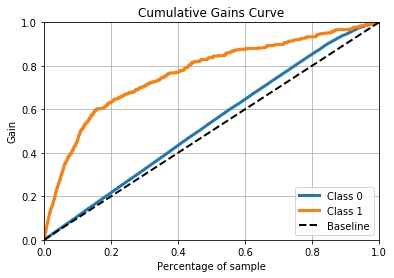

((array([0.00000000e+00, 2.42777373e-04, 4.85554746e-04, ...,
         9.99514445e-01, 9.99757223e-01, 1.00000000e+00]),
  array([0.00000000e+00, 2.72628135e-04, 5.45256270e-04, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00])),
 (array([0.00000000e+00, 2.42777373e-04, 4.85554746e-04, ...,
         9.99514445e-01, 9.99757223e-01, 1.00000000e+00]),
  array([0.        , 0.00221729, 0.00443459, ..., 1.        , 1.        ,
         1.        ])))

In [10]:
from utils.metrics import plot_cumulative_gain
#convert 1-D to 2-D array + transposing so the format is correct
y_pred_proba_new=np.vstack((1-y_pred_proba,y_pred_proba)).T
plot_cumulative_gain(y_test, y_pred_proba_new)

In [11]:
"""

area under the curve of class  0 : 0.5324652465299468
area under the curve of class  1 : 0.7640362301681269

area under the curve of class  0 : 0.5327736736508877
area under the curve of class  1 : 0.7665500613523347
"""

'\n\narea under the curve of class  0 : 0.5324652465299468\narea under the curve of class  1 : 0.7640362301681269\n\narea under the curve of class  0 : 0.5327736736508877\narea under the curve of class  1 : 0.7665500613523347\n'

In [12]:
import joblib
# save model
joblib.dump(clf, 'models/lgb.pkl')
# load model
#gbm_pickle = joblib.load('lgb.pkl')

['models/lgb.pkl']

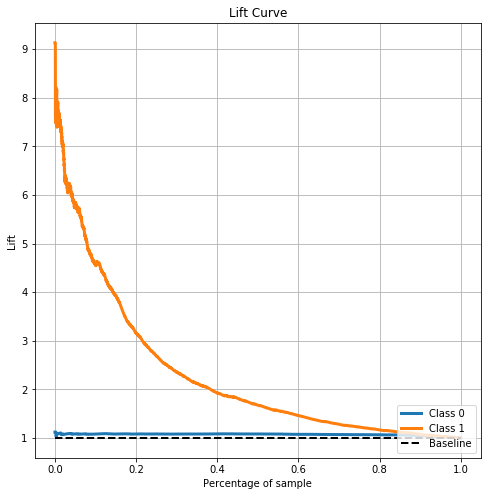

In [18]:
#TODO treba provjerit jel ovo radi i nac drugu funkciju ako ne radi
from utils.metrics import plot_lift_chart
fig, ax = plt.subplots(figsize=(8,8))
plot_lift_chart(y_test, y_pred_proba_new, ax)